In [49]:
%matplotlib inline
import pandas as pd
import requests
import json
from pprint import pprint
from bs4 import BeautifulSoup as bs
import pymongo
import matplotlib.pyplot as plt

In [2]:
data_01 = "Resources/201901-citibike-tripdata.csv"
data_02 = "Resources/201902-citibike-tripdata.csv"
data_03 = "Resources/201903-citibike-tripdata.csv"
data_04 = "Resources/201904-citibike-tripdata.csv"
data_05 = "Resources/201905-citibike-tripdata.csv"
data_06 = "Resources/201906-citibike-tripdata.csv"
data_07 = "Resources/201907-citibike-tripdata.csv"
data_08 = "Resources/201908-citibike-tripdata.csv"
data_09 = "Resources/201909-citibike-tripdata.csv"
data_10 = "Resources/201910-citibike-tripdata.csv"
data_11 = "Resources/201911-citibike-tripdata.csv"
data_12 = "Resources/201912-citibike-tripdata.csv"

In [3]:
data_pd_01= pd.read_csv(data_01)
data_pd_02= pd.read_csv(data_02)
data_pd_03= pd.read_csv(data_03)
data_pd_04= pd.read_csv(data_04)
data_pd_05= pd.read_csv(data_05)
data_pd_06= pd.read_csv(data_06)
data_pd_07= pd.read_csv(data_07)
data_pd_08= pd.read_csv(data_08)
data_pd_09= pd.read_csv(data_09)
data_pd_10= pd.read_csv(data_10)
data_pd_11= pd.read_csv(data_11)
data_pd_12= pd.read_csv(data_12)


In [4]:
data_pd_01.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [5]:
data_pd_01.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [6]:
datas=[data_pd_01, data_pd_02, data_pd_03, data_pd_04, data_pd_05, data_pd_06, data_pd_07, data_pd_08,
      data_pd_09, data_pd_10, data_pd_11, data_pd_12]

In [7]:
results=pd.concat(datas)
results.head()

tripduration                 starttime                  stoptime  \
0           320  2019-01-01 00:01:47.4010  2019-01-01 00:07:07.5810   
1           316  2019-01-01 00:04:43.7360  2019-01-01 00:10:00.6080   
2           591  2019-01-01 00:06:03.9970  2019-01-01 00:15:55.4380   
3          2719  2019-01-01 00:07:03.5450  2019-01-01 00:52:22.6500   
4           303  2019-01-01 00:07:35.9450  2019-01-01 00:12:39.5020   

   start station id           start station name  start station latitude  \
0            3160.0  Central Park West & W 76 St               40.778968   
1             519.0        Pershing Square North               40.751873   
2            3171.0      Amsterdam Ave & W 82 St               40.785247   
3             504.0              1 Ave & E 16 St               40.732219   
4             229.0               Great Jones St               40.727434   

   start station longitude  end station id        end station name  \
0               -73.973747          3283.0  W 89 St & Columbus Ave   
1               -73.977706           518.0         E 39 St & 2 Ave   
2               -73.976673          3154.0         E 77 St & 3 Ave   
3               -73.981656          3709.0         W 15 St & 6 Ave   
4               -73.993790           503.0      E 20 St & Park Ave   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.788221             -73.970416   15839  Subscriber   
1             40.747804             -73.973442   32723  Subscriber   
2             40.773142             -73.958562   27451  Subscriber   
3             40.738046             -73.996430   21579  Subscriber   
4             40.738274             -73.987520   35379  Subscriber   

   birth year  gender  
0        1971       1  
1        1964       1  
2        1987       1  
3        1990       1  
4        1979       1

In [8]:
#Looking for the most used station to start the trip
most_popular_startstation=results["start station id"].value_counts()
print(f"the most popular start station for 2019 is: {most_popular_startstation.head(1)}")

the most popular start station for 2019 is: 519.0    156575
Name: start station id, dtype: int64


In [9]:
#Loking for coordinates for the post used station(latitude and longtitude)
station_519 = results.loc[results['start station id']== 519]
station_519.head(1)

tripduration                 starttime                  stoptime  \
1           316  2019-01-01 00:04:43.7360  2019-01-01 00:10:00.6080   

   start station id     start station name  start station latitude  \
1             519.0  Pershing Square North               40.751873   

   start station longitude  end station id end station name  \
1               -73.977706           518.0  E 39 St & 2 Ave   

   end station latitude  end station longitude  bikeid    usertype  \
1             40.747804             -73.973442   32723  Subscriber   

   birth year  gender  
1        1964       1

In [10]:
#Create reduced DataFrame
bike_data=results[['starttime','tripduration', 'start station id', 'birth year', 'gender']].copy()
bike_data.head()

starttime  tripduration  start station id  birth year  \
0  2019-01-01 00:01:47.4010           320            3160.0        1971   
1  2019-01-01 00:04:43.7360           316             519.0        1964   
2  2019-01-01 00:06:03.9970           591            3171.0        1987   
3  2019-01-01 00:07:03.5450          2719             504.0        1990   
4  2019-01-01 00:07:35.9450           303             229.0        1979   

   gender  
0       1  
1       1  
2       1  
3       1  
4       1

In [11]:
bike_data.count()


starttime           20551697
tripduration        20551697
start station id    20551517
birth year          20551697
gender              20551697
dtype: int64

In [12]:
#clean the data and get rid of rows with empty values
bike_data=bike_data.dropna(how="any")
bike_data.count()

starttime           20551517
tripduration        20551517
start station id    20551517
birth year          20551517
gender              20551517
dtype: int64

In [13]:
#split starttime column into two columns: date and time
bike_data[['date', 'start_time']] = bike_data.starttime.str.split(" ",expand=True, )
bike_data=bike_data.drop(columns=['starttime'] )
bike_data[['starttime', 'notneeded']] = bike_data.start_time.str.split(".",expand=True, )
bike_data=bike_data.drop(columns=['start_time', 'notneeded'] )

bike_data.head()

tripduration  start station id  birth year  gender        date starttime
0           320            3160.0        1971       1  2019-01-01  00:01:47
1           316             519.0        1964       1  2019-01-01  00:04:43
2           591            3171.0        1987       1  2019-01-01  00:06:03
3          2719             504.0        1990       1  2019-01-01  00:07:03
4           303             229.0        1979       1  2019-01-01  00:07:35

In [14]:
#Open and pprint json file that contains weather data for every hour of 2019. 
#The location is a location of the most used bike station in NYC
filepath = "Resources/ny_weather.json"

with open(filepath) as jsonfile:
    json_file = json.load(jsonfile)

pprint(json_file)


[{'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546300800,
  'dt_iso': '2019-01-01 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.7,
           'humidity': 90,
           'pressure': 1020,
           'temp': 43.75,
           'temp_max': 45,
           'temp_min': 42.01},
  'rain': {'1h': 3.17},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 122, 'speed': 8.95}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1546304400,
  'dt_iso': '2019-01-01 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.46,
           'humidity': 95,
           'pressure': 1018.6,
           'temp': 43.88,
           'temp_max': 45,
           'temp_min': 42.01},
  'rain': {'1h': 4.39},
  'timezone': -18000,
  'weather': [{'description': 'heavy intensity rain',
  

  'dt_iso': '2019-01-03 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.8,
           'humidity': 79,
           'pressure': 1017.9,
           'temp': 39.61,
           'temp_max': 42.01,
           'temp_min': 37},
  'rain': {'1h': 0.12},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 143, 'speed': 4.43}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546498800,
  'dt_iso': '2019-01-03 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.46,
           'humidity': 81,
           'pressure': 1017,
           'temp': 39.7,
           'temp_max': 42.01,
           'temp_min': 37},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 

               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 31, 'speed': 9.95}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546704000,
  'dt_iso': '2019-01-05 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.99,
           'humidity': 93,
           'pressure': 996.7,
           'temp': 44.2,
           'temp_max': 46.4,
           'temp_min': 42.01},
  'rain': {'1h': 1.01},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 22, 'speed': 9.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1546707600,
  'dt_iso': '2019-01-05 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.11,
           'humidity': 92,
           'pressure': 997,
           'temp': 44.49,
           'temp_max': 46.99,
           'temp_min': 42.01},
  

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 140, 'speed': 4.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1546909200,
  'dt_iso': '2019-01-08 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.18,
           'humidity': 57,
           'pressure': 1027.9,
           'temp': 31.62,
           'temp_max': 35.01,
           'temp_min': 28},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1546912800,
  'dt_iso': '2019-01-08 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.7,
           'humidity': 59,
           'pressure': 1028.1,
           'temp': 31.87,

           'temp_min': 30.99},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 287, 'speed': 13.15}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1547110800,
  'dt_iso': '2019-01-10 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.87,
           'humidity': 64,
           'pressure': 1003.5,
           'temp': 31.95,
           'temp_max': 34,
           'temp_min': 28.99},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 284, 'speed': 12.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 70},
  'dt': 1547114400,
  'dt_iso': '2019-01-10 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.74,

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 298, 'speed': 4.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1547319600,
  'dt_iso': '2019-01-12 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.23,
           'humidity': 42,
           'pressure': 1032.8,
           'temp': 33.48,
           'temp_max': 36,
           'temp_min': 30.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 304, 'speed': 4.72}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1547323200,
  'dt_iso': '2019-01-12 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.45,
           'humidity': 41,
           'pressure': 1032.6,
           'temp': 33.5

           'temp_max': 32,
           'temp_min': 19.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 316, 'speed': 4.72}},
 {'city_name': 'Custom location',
  'clouds': {'all': 3},
  'dt': 1547532000,
  'dt_iso': '2019-01-15 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 17.37,
           'humidity': 69,
           'pressure': 1020.2,
           'temp': 25.38,
           'temp_max': 30.2,
           'temp_min': 19},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 318, 'speed': 4.81}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1547535600,
  'dt_iso': '2019-01-15 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 17.24,
           'h

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 20.8,
           'humidity': 48,
           'pressure': 1030.1,
           'temp': 28.45,
           'temp_max': 32,
           'temp_min': 26.01},
  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 23, 'speed': 3.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 80},
  'dt': 1547744400,
  'dt_iso': '2019-01-17 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 22.05,
           'humidity': 46,
           'pressure': 1028.9,
           'temp': 29.25,
           'temp_max': 32,
           'temp_min': 27},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 51, 'speed': 2.64}},
 {'city_name': 'Custom location',
  'clouds': {'a

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.78,
           'humidity': 83,
           'pressure': 1017.9,
           'temp': 36.93,
           'temp_max': 39,
           'temp_min': 35.01},
  'rain': {'1h': 0.29},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 80, 'speed': 8.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1547946000,
  'dt_iso': '2019-01-20 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.15,
           'humidity': 85,
           'pressure': 1016.5,
           'temp': 36.54,
           'temp_max': 39.99,
           'temp_min': 33.01},
  'rain': {'1h': 0.38},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 89, 'speed': 8.68}},
 {'cit

           'temp_min': 10},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 306, 'speed': 8.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548162000,
  'dt_iso': '2019-01-22 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 3.58,
           'humidity': 64,
           'pressure': 1037.1,
           'temp': 14.27,
           'temp_max': 17.6,
           'temp_min': 10},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 307, 'speed': 8.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548165600,
  'dt_iso': '2019-01-22 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 5.2,
           'humidity': 60,
     

  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 187, 'speed': 18.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1548349200,
  'dt_iso': '2019-01-24 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.71,
           'humidity': 92,
           'pressure': 995.2,
           'temp': 55.56,
           'temp_max': 60.01,
           'temp_min': 51.01},
  'rain': {'1h': 4.07},
  'timezone': -18000,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 189, 'speed': 15.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1548352800,
  'dt_iso': '2019-01-24 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.53,
           'humidity': 92,
           'pressure

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 170, 'speed': 4.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548561600,
  'dt_iso': '2019-01-27 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.81,
           'humidity': 76,
           'pressure': 1023.8,
           'temp': 30.87,
           'temp_max': 34,
           'temp_min': 26.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 165, 'speed': 4.43}},
 {'city_name': 'Custom location',
  'clouds': {'all': 4},
  'dt': 1548565200,
  'dt_iso': '2019-01-27 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.31,
           'humidity': 78,
           'pressure': 1023.3,
           'temp': 30.61,
        

  'rain': {'1h': 0.15},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 136, 'speed': 6.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1548788400,
  'dt_iso': '2019-01-29 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.57,
           'humidity': 75,
           'pressure': 1011.5,
           'temp': 39.47,
           'temp_max': 43,
           'temp_min': 33.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 130, 'speed': 7.74}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1548792000,
  'dt_iso': '2019-01-29 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.9,
           'humidity': 82,
           'press

           'temp_max': 16,
           'temp_min': 10},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 265, 'speed': 4.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1549004400,
  'dt_iso': '2019-02-01 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 4.01,
           'humidity': 53,
           'pressure': 1030.8,
           'temp': 13.12,
           'temp_max': 16,
           'temp_min': 9},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 273, 'speed': 4.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1549008000,
  'dt_iso': '2019-02-01 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 3.38,
           'humidity'

               'main': 'Clouds'}],
  'wind': {'deg': 229, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 54},
  'dt': 1549220400,
  'dt_iso': '2019-02-03 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.8,
           'humidity': 58,
           'pressure': 1019.7,
           'temp': 51.62,
           'temp_max': 55.99,
           'temp_min': 46.99},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 208, 'speed': 3.74}},
 {'city_name': 'Custom location',
  'clouds': {'all': 45},
  'dt': 1549224000,
  'dt_iso': '2019-02-03 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.44,
           'humidity': 58,
           'pressure': 1019.3,
           'temp': 51.44,
           'temp_max': 55,
           'temp_min': 46.99},
  'timezone': -18000,
  'weather': [{'descrip

           'temp_min': 37},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 350, 'speed': 6.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549440000,
  'dt_iso': '2019-02-06 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.57,
           'humidity': 79,
           'pressure': 1020.7,
           'temp': 38.43,
           'temp_max': 42.08,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 351, 'speed': 5.97}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549443600,
  'dt_iso': '2019-02-06 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 30.96,
           'humidity': 79,


  'clouds': {'all': 31},
  'dt': 1549656000,
  'dt_iso': '2019-02-08 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.54,
           'humidity': 44,
           'pressure': 1013.7,
           'temp': 53.38,
           'temp_max': 54,
           'temp_min': 50.72},
  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 272, 'speed': 14.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 6},
  'dt': 1549659600,
  'dt_iso': '2019-02-08 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 38.21,
           'humidity': 39,
           'pressure': 1014.6,
           'temp': 51.35,
           'temp_max': 53.6,
           'temp_min': 48.92},
  'rain': {'3h': 0.3},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
       

           'temp': 33.12,
           'temp_max': 35.01,
           'temp_min': 30.99},
  'snow': {'1h': 0.26},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 265, 'speed': 2.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549868400,
  'dt_iso': '2019-02-11 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.32,
           'humidity': 72,
           'pressure': 1027,
           'temp': 31.17,
           'temp_max': 34,
           'temp_min': 28},
  'snow': {'1h': 0.14},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 265, 'speed': 2.08}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549872000,
  'dt_iso': '2019-02-11 08:00:00 +0000 UTC',
  'lat': 40.751

  'dt_iso': '2019-02-13 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.73,
           'humidity': 63,
           'pressure': 1005.7,
           'temp': 40.44,
           'temp_max': 43,
           'temp_min': 37.99},
  'rain': {'1h': 1.21},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 268, 'speed': 15.46}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1550077200,
  'dt_iso': '2019-02-13 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.55,
           'humidity': 60,
           'pressure': 1005.8,
           'temp': 39.96,
           'temp_max': 42.01,
           'temp_min': 37.99},
  'rain': {'1h': 1.1},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rai

  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 209, 'speed': 6.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550278800,
  'dt_iso': '2019-02-16 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 45,
           'humidity': 62,
           'pressure': 1003.8,
           'temp': 51.06,
           'temp_max': 57.2,
           'temp_min': 44.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 247, 'speed': 6.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550282400,
  'dt_iso': '2019-02-16 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.31,
           'humidity': 65,
           'pressure': 1004.3,
 

               'main': 'Snow'}],
  'wind': {'deg': 87, 'speed': 5.12}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550480400,
  'dt_iso': '2019-02-18 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.05,
           'humidity': 97,
           'pressure': 1010.3,
           'temp': 33.39,
           'temp_max': 35.06,
           'temp_min': 32},
  'rain': {'1h': 0.28, '3h': 0.5},
  'snow': {'1h': 0.28, '3h': 0.43},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 87, 'speed': 5.08}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1550484000,
  'dt_iso': '2019-02-18 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 2

               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 71, 'speed': 3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550667600,
  'dt_iso': '2019-02-20 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 18.82,
           'humidity': 51,
           'pressure': 1036.3,
           'temp': 26.8,
           'temp_max': 28.99,
           'temp_min': 24.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 87, 'speed': 4.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550671200,
  'dt_iso': '2019-02-20 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.8,
           'humidity': 52,
           'pressure': 1036.2,
           'temp': 28,
           'temp_max': 30.2,
           'temp_min': 

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550862000,
  'dt_iso': '2019-02-22 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.2,
           'humidity': 47,
           'pressure': 1027.2,
           'temp': 43.63,
           'temp_max': 45,
           'temp_min': 41.9},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 328, 'speed': 6.96}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550865600,
  'dt_iso': '2019-02-22 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.35,
           'humidity': 46,
           'pressure': 1028.1,
           'temp': 43.81,
           'temp_max': 46.04,
           'temp_min': 42.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               '

           'humidity': 53,
           'pressure': 999.1,
           'temp': 43.9,
           'temp_max': 45,
           'temp_min': 42.62},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 264, 'speed': 19.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 2},
  'dt': 1551074400,
  'dt_iso': '2019-02-25 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.61,
           'humidity': 50,
           'pressure': 999.9,
           'temp': 42.55,
           'temp_max': 43.34,
           'temp_min': 41},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 265, 'speed': 18.61}},
 {'city_name': 'Custom location',
  'clouds': {'all': 54},
  'dt': 1551078000,
  'dt_iso': '2019-

           'temp': 28.13,
           'temp_max': 32,
           'temp_min': 24.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 147, 'speed': 5.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1551294000,
  'dt_iso': '2019-02-27 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.09,
           'humidity': 56,
           'pressure': 1025.5,
           'temp': 28.42,
           'temp_max': 33.01,
           'temp_min': 24.44},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 146, 'speed': 6.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 37},
  'dt': 1551297600,
  'dt_iso': '2019-02-27 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'ma

  'wind': {'deg': 47, 'speed': 7.38}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1551502800,
  'dt_iso': '2019-03-02 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.98,
           'humidity': 83,
           'pressure': 1020.5,
           'temp': 33.1,
           'temp_max': 34,
           'temp_min': 32},
  'rain': {},
  'snow': {'1h': 0.3},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 38, 'speed': 7.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1551506400,
  'dt_iso': '2019-03-02 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.55,
           'humidity': 86,
           'pressure': 1019.9,
           'temp': 32.83,
           'temp_max': 34,
           'temp_min': 30.99},
  'rain': {},
  'snow': {'1h': 0.83},
  'timezone': -1

  'lon': -73.977706,
  'main': {'feels_like': 24.35,
           'humidity': 87,
           'pressure': 1005.4,
           'temp': 33.71,
           'temp_max': 35.06,
           'temp_min': 32},
  'rain': {'1h': 0.61},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 342, 'speed': 9.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1551700800,
  'dt_iso': '2019-03-04 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.4,
           'humidity': 88,
           'pressure': 1006.1,
           'temp': 33.8,
           'temp_max': 35.06,
           'temp_min': 32},
  'rain': {'1h': 0.68},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'},
              {'description': 'mist',
               'ico

 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1551909600,
  'dt_iso': '2019-03-06 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 12.33,
           'humidity': 45,
           'pressure': 1021.3,
           'temp': 24.76,
           'temp_max': 27,
           'temp_min': 23},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 286, 'speed': 11.45}},
 {'city_name': 'Custom location',
  'clouds': {'all': 87},
  'dt': 1551913200,
  'dt_iso': '2019-03-06 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 13.28,
           'humidity': 47,
           'pressure': 1022,
           'temp': 23.97,
           'temp_max': 26.06,
           'temp_min': 21.99},
  'snow': {'1h': 0.2},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
  

  'main': {'feels_like': 25.66,
           'humidity': 82,
           'pressure': 1024.8,
           'temp': 32.76,
           'temp_max': 35.6,
           'temp_min': 27},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 301, 'speed': 5.26}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1552132800,
  'dt_iso': '2019-03-09 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.19,
           'humidity': 83,
           'pressure': 1025.3,
           'temp': 33.01,
           'temp_max': 36,
           'temp_min': 27},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 306, 'speed': 4.9}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1552136400,
  'dt_iso': '2019-0

  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 10.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1552338000,
  'dt_iso': '2019-03-11 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.86,
           'humidity': 39,
           'pressure': 1016,
           'temp': 52.43,
           'temp_max': 53.96,
           'temp_min': 49.46},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 270, 'speed': 11.5}},
 {'city_name': 'Custom location',
  'clouds': {'all': 4},
  'dt': 1552341600,
  'dt_iso': '2019-03-11 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.65,
           'humidity': 38,
           'pressure': 1015.4,
           'temp': 52.29,
      

  'dt_iso': '2019-03-14 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.8,
           'humidity': 69,
           'pressure': 1024.1,
           'temp': 41.45,
           'temp_max': 43,
           'temp_min': 39},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 192, 'speed': 3.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 61},
  'dt': 1552554000,
  'dt_iso': '2019-03-14 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.09,
           'humidity': 69,
           'pressure': 1024.2,
           'temp': 41.61,
           'temp_max': 43,
           'temp_min': 39},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 183, 'speed': 3.51}},
 {'city_

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 284, 'speed': 14.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 54},
  'dt': 1552770000,
  'dt_iso': '2019-03-16 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.73,
           'humidity': 38,
           'pressure': 1015.4,
           'temp': 49.01,
           'temp_max': 52,
           'temp_min': 46},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 283, 'speed': 13.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 39},
  'dt': 1552773600,
  'dt_iso': '2019-03-16 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.69,
           'humidity': 41,
           'pressure': 1015.9,
           't

               'main': 'Clouds'}],
  'wind': {'deg': 318, 'speed': 1.99}},
 {'city_name': 'Custom location',
  'clouds': {'all': 56},
  'dt': 1552971600,
  'dt_iso': '2019-03-19 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.93,
           'humidity': 69,
           'pressure': 1027.6,
           'temp': 35.96,
           'temp_max': 41,
           'temp_min': 28.99},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 317, 'speed': 3.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 14},
  'dt': 1552975200,
  'dt_iso': '2019-03-19 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.46,
           'humidity': 65,
           'pressure': 1027.8,
           'temp': 36.09,
           'temp_max': 39.99,
           'temp_min': 30},
  'timezone': -14400,
  'weather': [{'descripti

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 40, 'speed': 13.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1553184000,
  'dt_iso': '2019-03-21 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.88,
           'humidity': 92,
           'pressure': 1018.3,
           'temp': 44.96,
           'temp_max': 48,
           'temp_min': 42.01},
  'rain': {'1h': 0.71},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 50, 'speed': 11.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1553187600,
  'dt_iso': '2019-03-21 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 38.03,
           'humidity': 88,
           'pressure': 1017.3,
           '

               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 301, 'speed': 11.63}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553392800,
  'dt_iso': '2019-03-24 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.3,
           'humidity': 32,
           'pressure': 1020.1,
           'temp': 42.71,
           'temp_max': 44.01,
           'temp_min': 39.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 302, 'speed': 10.6}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553396400,
  'dt_iso': '2019-03-24 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.15,
           'humidity': 35,
           'pressure': 1020.6,
           'temp': 41.77,
           'temp_max': 43,
           'temp_min': 3

 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1553598000,
  'dt_iso': '2019-03-26 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.9,
           'humidity': 45,
           'pressure': 1022.7,
           'temp': 32.76,
           'temp_max': 35.6,
           'temp_min': 30},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 5, 'speed': 9.46}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553601600,
  'dt_iso': '2019-03-26 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 22.82,
           'humidity': 43,
           'pressure': 1023.5,
           'temp': 33.6,
           'temp_max': 35.6,
           'temp_min': 32},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
        

  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 183, 'speed': 8.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1553796000,
  'dt_iso': '2019-03-28 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.23,
           'humidity': 45,
           'pressure': 1027.9,
           'temp': 50.22,
           'temp_max': 55.99,
           'temp_min': 45.14},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 183, 'speed': 9.01}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1553799600,
  'dt_iso': '2019-03-28 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.92,
           'humidity': 43,
           'pressure': 1026.4,

  'dt_iso': '2019-03-31 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.35,
           'humidity': 70,
           'pressure': 1010.4,
           'temp': 54.16,
           'temp_max': 59,
           'temp_min': 48.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 179, 'speed': 11.63}},
 {'city_name': 'Custom location',
  'clouds': {'all': 86},
  'dt': 1554008400,
  'dt_iso': '2019-03-31 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 45.61,
           'humidity': 73,
           'pressure': 1009.7,
           'temp': 53.53,
           'temp_max': 58.28,
           'temp_min': 48.92},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 180, 'speed': 1

  'dt_iso': '2019-04-02 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.64,
           'humidity': 70,
           'pressure': 1030,
           'temp': 43.2,
           'temp_max': 46,
           'temp_min': 39.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 138, 'speed': 5.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 18},
  'dt': 1554213600,
  'dt_iso': '2019-04-02 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.76,
           'humidity': 55,
           'pressure': 1030.1,
           'temp': 45.5,
           'temp_max': 46.99,
           'temp_min': 43.16},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 147, 'speed': 6.98}},
 {'city

  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 315, 'speed': 8.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 24},
  'dt': 1554418800,
  'dt_iso': '2019-04-04 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.44,
           'humidity': 29,
           'pressure': 1028.2,
           'temp': 55.33,
           'temp_max': 57.99,
           'temp_min': 53.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 324, 'speed': 5.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 25},
  'dt': 1554422400,
  'dt_iso': '2019-04-05 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.08,
           'humidity': 32,
           'pressure': 1028.7,
           'temp'

           'temp_min': 44.01},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 341, 'speed': 2.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 7},
  'dt': 1554620400,
  'dt_iso': '2019-04-07 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 45.68,
           'humidity': 80,
           'pressure': 1024.1,
           'temp': 49.15,
           'temp_max': 55.4,
           'temp_min': 43},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 344, 'speed': 3.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1554624000,
  'dt_iso': '2019-04-07 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.76,
           'humidity': 82,
           '

               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 121, 'speed': 7.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1554822000,
  'dt_iso': '2019-04-09 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.5,
           'humidity': 81,
           'pressure': 1006.5,
           'temp': 47.34,
           'temp_max': 50,
           'temp_min': 44.96},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 124, 'speed': 8.84}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1554825600,
  'dt_iso': '2019-04-09 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.21,
           'humidity': 81,
           'pressure': 1006.1,
           'temp': 47.52,
           'temp_max': 50,
           'temp_mi

  'main': {'feels_like': 40.05,
           'humidity': 46,
           'pressure': 1024.9,
           'temp': 47.08,
           'temp_max': 51.01,
           'temp_min': 44.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 136, 'speed': 5.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1555027200,
  'dt_iso': '2019-04-12 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.56,
           'humidity': 50,
           'pressure': 1025.5,
           'temp': 46.62,
           'temp_max': 48.99,
           'temp_min': 44.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 143, 'speed': 5.44}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'd

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.02,
           'humidity': 87,
           'pressure': 1014.5,
           'temp': 61.77,
           'temp_max': 66.2,
           'temp_min': 57.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 266, 'speed': 3.98}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1555232400,
  'dt_iso': '2019-04-14 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.93,
           'humidity': 85,
           'pressure': 1014.7,
           'temp': 61.18,
           'temp_max': 66.2,
           'temp_min': 55.4},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 276, 'speed': 4.14}},
 {'city_n

           'humidity': 31,
           'pressure': 1016.4,
           'temp': 57.04,
           'temp_max': 59,
           'temp_min': 53.6},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 286, 'speed': 14.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1555434000,
  'dt_iso': '2019-04-16 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 48.02,
           'humidity': 29,
           'pressure': 1015.9,
           'temp': 60.17,
           'temp_max': 63,
           'temp_min': 56.48},
  'rain': {'1h': 0.2},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 288, 'speed': 14.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1555437600,
  'dt_iso': 

  'wind': {'deg': 155, 'speed': 6.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 70},
  'dt': 1555635600,
  'dt_iso': '2019-04-19 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.02,
           'humidity': 78,
           'pressure': 1011.7,
           'temp': 57.69,
           'temp_max': 62.06,
           'temp_min': 53.42},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 171, 'speed': 8.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 76},
  'dt': 1555639200,
  'dt_iso': '2019-04-19 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.49,
           'humidity': 77,
           'pressure': 1011.9,
           'temp': 57.33,
           'temp_max': 63,
           'temp_min': 53.96},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
          

 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1555840800,
  'dt_iso': '2019-04-21 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.27,
           'humidity': 86,
           'pressure': 1012.9,
           'temp': 53.49,
           'temp_max': 55.04,
           'temp_min': 51.8},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 106, 'speed': 5.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1555844400,
  'dt_iso': '2019-04-21 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.79,
           'humidity': 86,
           'pressure': 1013.2,
           'temp': 53.83,
           'temp_max': 55.4,
           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon

               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 304, 'speed': 6.64}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1556013600,
  'dt_iso': '2019-04-23 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.36,
           'humidity': 78,
           'pressure': 1015.4,
           'temp': 55.54,
           'temp_max': 57.99,
           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 297, 'speed': 5.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 16},
  'dt': 1556017200,
  'dt_iso': '2019-04-23 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.74,
           'humidity': 77,
           'pressure': 1015.8,
           'temp': 56.12,
           'temp_max': 59,
           '

           'temp_min': 55},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 167, 'speed': 3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1556211600,
  'dt_iso': '2019-04-25 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.94,
           'humidity': 52,
           'pressure': 1014.5,
           'temp': 61.72,
           'temp_max': 66,
           'temp_min': 54.32},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 181, 'speed': 4.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1556215200,
  'dt_iso': '2019-04-25 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.52,
           'humidity': 52,
       

  'main': {'feels_like': 47.75,
           'humidity': 49,
           'pressure': 1008.3,
           'temp': 54.37,
           'temp_max': 57.99,
           'temp_min': 50},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 334, 'speed': 6.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 13},
  'dt': 1556413200,
  'dt_iso': '2019-04-28 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.35,
           'humidity': 54,
           'pressure': 1009.6,
           'temp': 52.18,
           'temp_max': 57.2,
           'temp_min': 46.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 343, 'speed': 5.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 9},
  'd

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.1,
           'humidity': 93,
           'pressure': 1021.3,
           'temp': 48.74,
           'temp_max': 50,
           'temp_min': 46.99},
  'rain': {'1h': 0.47, '3h': 0.9},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 163, 'speed': 1.61}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1556618400,
  'dt_iso': '2019-04-30 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.6,
           'humidity': 94,
           'pressure': 1021.7,
           'temp': 48.92,
           'temp_max': 50,
           'temp_min': 46.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 94, 'speed': 3.02}},
 {

  'clouds': {'all': 67},
  'dt': 1556820000,
  'dt_iso': '2019-05-02 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.05,
           'humidity': 61,
           'pressure': 1019.1,
           'temp': 73.56,
           'temp_max': 78.01,
           'temp_min': 66},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 247, 'speed': 0.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1556823600,
  'dt_iso': '2019-05-02 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.54,
           'humidity': 55,
           'pressure': 1019,
           'temp': 74.52,
           'temp_max': 79,
           'temp_min': 65.66},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
 

  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 116, 'speed': 3.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557021600,
  'dt_iso': '2019-05-05 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.17,
           'humidity': 89,
           'pressure': 1010.9,
           'temp': 57.18,
           'temp_max': 62.01,
           'temp_min': 53.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 117, 'speed': 3.98}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557025200,
  'dt_iso': '2019-05-05 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.9,
           'humidity': 93,
           'pressure': 1010.6,
        

  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 166, 'speed': 5.39}},
 {'city_name': 'Custom location',
  'clouds': {'all': 16},
  'dt': 1557212400,
  'dt_iso': '2019-05-07 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.78,
           'humidity': 85,
           'pressure': 1021.1,
           'temp': 52.86,
           'temp_max': 55,
           'temp_min': 51.01},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 181, 'speed': 4.9}},
 {'city_name': 'Custom location',
  'clouds': {'all': 13},
  'dt': 1557216000,
  'dt_iso': '2019-05-07 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.34,
           'humidity': 86,
           'pressure': 1021.5,
           'temp': 53.04,
   

  'wind': {'deg': 97, 'speed': 9.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557417600,
  'dt_iso': '2019-05-09 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.93,
           'humidity': 59,
           'pressure': 1026.4,
           'temp': 57.42,
           'temp_max': 61,
           'temp_min': 55},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 105, 'speed': 10.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557421200,
  'dt_iso': '2019-05-09 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.97,
           'humidity': 58,
           'pressure': 1026.1,
           'temp': 58.46,
           'temp_max': 62.01,
           'temp_min': 54.86},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
       

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557619200,
  'dt_iso': '2019-05-12 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.99,
           'humidity': 54,
           'pressure': 1015.2,
           'temp': 66.02,
           'temp_max': 69.01,
           'temp_min': 62.6},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 86, 'speed': 1.43}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557622800,
  'dt_iso': '2019-05-12 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.47,
           'humidity': 56,
           'pressure': 1015.9,
           'temp': 63.68,
           'temp_max': 66.92,
           'temp_min': 60.98},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               

  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 62, 'speed': 4.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557817200,
  'dt_iso': '2019-05-14 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.48,
           'humidity': 89,
           'pressure': 1009.5,
           'temp': 44.69,
           'temp_max': 46.4,
           'temp_min': 44.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 65, 'speed': 4.12}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557820800,
  'dt_iso': '2019-05-14 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.6,
           'humidity': 90,
           'pressu

  'main': {'feels_like': 59.74,
           'humidity': 46,
           'pressure': 1011.85,
           'temp': 66.15,
           'temp_max': 68,
           'temp_min': 64},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 9.22}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1558022400,
  'dt_iso': '2019-05-16 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.46,
           'humidity': 40,
           'pressure': 1011.5,
           'temp': 68.02,
           'temp_max': 71.01,
           'temp_min': 64.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 6.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},


  'clouds': {'all': 1},
  'dt': 1558213200,
  'dt_iso': '2019-05-18 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.76,
           'humidity': 38,
           'pressure': 1015.58,
           'temp': 73.8,
           'temp_max': 80.01,
           'temp_min': 69.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 180, 'speed': 5.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1558216800,
  'dt_iso': '2019-05-18 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.59,
           'humidity': 46,
           'pressure': 1015.92,
           'temp': 71.46,
           'temp_max': 77,
           'temp_min': 66},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
       

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55,
           'humidity': 60,
           'pressure': 1010.5,
           'temp': 61.88,
           'temp_max': 63,
           'temp_min': 60.01},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 314, 'speed': 11.34}},
 {'city_name': 'Custom location',
  'clouds': {'all': 65},
  'dt': 1558429200,
  'dt_iso': '2019-05-21 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.57,
           'humidity': 60,
           'pressure': 1011.2,
           'temp': 60.44,
           'temp_max': 62.01,
           'temp_min': 59},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 316, 'speed': 12.5}},
 {'city_name': 'Custom location',
  'clouds': {'

  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 215, 'speed': 7.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1558638000,
  'dt_iso': '2019-05-23 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.37,
           'humidity': 64,
           'pressure': 1016.3,
           'temp': 72.59,
           'temp_max': 75,
           'temp_min': 68.54},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 225, 'speed': 7.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1558641600,
  'dt_iso': '2019-05-23 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.59,
           'humidity': 72,
           'pressure': 1017,
         

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 166, 'speed': 10.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 83},
  'dt': 1558836000,
  'dt_iso': '2019-05-26 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.67,
           'humidity': 68,
           'pressure': 1018.4,
           'temp': 61.11,
           'temp_max': 62.96,
           'temp_min': 59},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 173, 'speed': 10.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1558839600,
  'dt_iso': '2019-05-26 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.95,
           'humidity': 78,
           'pressure': 1019,
           'temp': 60.91,


 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1559041200,
  'dt_iso': '2019-05-28 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.45,
           'humidity': 80,
           'pressure': 1013.1,
           'temp': 64.51,
           'temp_max': 66.2,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 76, 'speed': 6.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1559044800,
  'dt_iso': '2019-05-28 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.59,
           'humidity': 78,
           'pressure': 1012.7,
           'temp': 65.08,
           'temp_max': 68,
           'temp_min': 62.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
    

  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 140, 'speed': 6.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1559235600,
  'dt_iso': '2019-05-30 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.25,
           'humidity': 80,
           'pressure': 1009.3,
           'temp': 65.68,
           'temp_max': 69.01,
           'temp_min': 62.06},
  'rain': {'1h': 0.2},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 172, 'speed': 4.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1559239200,
  'dt_iso': '2019-05-30 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.55,
           'humidity': 80,
           'pressure': 1009,
     

           'temp': 77.14,
           'temp_max': 82,
           'temp_min': 73.04},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1559412000,
  'dt_iso': '2019-06-01 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.58,
           'humidity': 49,
           'pressure': 1008.8,
           'temp': 78.82,
           'temp_max': 82.99,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 50, 'speed': 10.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1559415600,
  'dt_iso': '2019-06-01 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {

  'wind': {'deg': 304, 'speed': 5.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1559613600,
  'dt_iso': '2019-06-04 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 58.06,
           'humidity': 44,
           'pressure': 1016.8,
           'temp': 63.07,
           'temp_max': 65.12,
           'temp_min': 57.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 311, 'speed': 5.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1559617200,
  'dt_iso': '2019-06-04 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.87,
           'humidity': 60,
           'pressure': 1017.3,
           'temp': 61.56,
           'temp_max': 64.4,
           'temp_min': 55},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky 

  'dt': 1559815200,
  'dt_iso': '2019-06-06 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73,
           'humidity': 88,
           'pressure': 1005.2,
           'temp': 70.11,
           'temp_max': 73,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 242, 'speed': 5.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 54},
  'dt': 1559818800,
  'dt_iso': '2019-06-06 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.63,
           'humidity': 87,
           'pressure': 1005.6,
           'temp': 70.93,
           'temp_max': 73.4,
           'temp_min': 68.36},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clo

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.65,
           'humidity': 40,
           'pressure': 1021,
           'temp': 79.45,
           'temp_max': 82.99,
           'temp_min': 75},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 89, 'speed': 8.39}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1560020400,
  'dt_iso': '2019-06-08 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.9,
           'humidity': 41,
           'pressure': 1021,
           'temp': 79.47,
           'temp_max': 84,
           'temp_min': 73.94},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 96, 'speed': 8.34}},
 {'city_name': 'Custom location',
 

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1560211200,
  'dt_iso': '2019-06-11 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.64,
           'humidity': 93,
           'pressure': 1012.7,
           'temp': 67.55,
           'temp_max': 69.98,
           'temp_min': 64.4},
  'rain': {'1h': 0.23},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 112, 'speed': 6.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1560214800,
  'dt_iso': '2019-06-11 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.94,
           'humidity': 93,
           'pressure': 1012.3,
           'temp': 67.84,
           'temp_max': 70,
           'temp_min': 64.94},
  'rain': {'1h': 0.53},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
         

 {'city_name': 'Custom location',
  'clouds': {'all': 94},
  'dt': 1560402000,
  'dt_iso': '2019-06-13 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.7,
           'humidity': 81,
           'pressure': 1018.1,
           'temp': 63.59,
           'temp_max': 64.99,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 112, 'speed': 7.67}},
 {'city_name': 'Custom location',
  'clouds': {'all': 89},
  'dt': 1560405600,
  'dt_iso': '2019-06-13 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.54,
           'humidity': 81,
           'pressure': 1016.9,
           'temp': 63.45,
           'temp_max': 64.99,
           'temp_min': 61},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'i

  'main': {'feels_like': 60.22,
           'humidity': 70,
           'pressure': 1020.7,
           'temp': 62.04,
           'temp_max': 66,
           'temp_min': 57.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 241, 'speed': 4.45}},
 {'city_name': 'Custom location',
  'clouds': {'all': 25},
  'dt': 1560600000,
  'dt_iso': '2019-06-15 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.55,
           'humidity': 70,
           'pressure': 1020.6,
           'temp': 64.42,
           'temp_max': 66.99,
           'temp_min': 61},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 228, 'speed': 3.96}},
 {'city_name': 'Custom location',
  'clouds': {'all': 2},
 

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 0, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1560801600,
  'dt_iso': '2019-06-17 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.54,
           'humidity': 78,
           'pressure': 1016.3,
           'temp': 73.58,
           'temp_max': 75.99,
           'temp_min': 71.01},
  'rain': {'1h': 0.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 260, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1560805200,
  'dt_iso': '2019-06-17 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.87,
           'humidity': 79,
           'pressure': 1015.4,
           't

  'main': {'feels_like': 68.67,
           'humidity': 93,
           'pressure': 1008.2,
           'temp': 67.39,
           'temp_max': 69.8,
           'temp_min': 64.94},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 96, 'speed': 7.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1560996000,
  'dt_iso': '2019-06-20 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.93,
           'humidity': 93,
           'pressure': 1008.2,
           'temp': 66.63,
           'temp_max': 69.08,
           'temp_min': 64.4},
  'rain': {'1h': 0.34},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 99, 'speed': 6.73}},
 {'city_name': 'Custom location',
  'clouds': 

  'main': {'feels_like': 61.27,
           'humidity': 67,
           'pressure': 1011.1,
           'temp': 65.53,
           'temp_max': 67.1,
           'temp_min': 62.01},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 298, 'speed': 9.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1561186800,
  'dt_iso': '2019-06-22 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.24,
           'humidity': 68,
           'pressure': 1010.9,
           'temp': 64.81,
           'temp_max': 66.99,
           'temp_min': 62.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 304, 'speed': 10.31}},
 {'city_name': 'Custom location',
  'clouds': {'all

           'temp_min': 79},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 241, 'speed': 2.84}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1561392000,
  'dt_iso': '2019-06-24 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.55,
           'humidity': 41,
           'pressure': 1012.2,
           'temp': 83.8,
           'temp_max': 87.01,
           'temp_min': 80.6},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 230, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 88},
  'dt': 1561395600,
  'dt_iso': '2019-06-24 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.97,
           'humidity': 45,
           '

 {'city_name': 'Custom location',
  'clouds': {'all': 12},
  'dt': 1561600800,
  'dt_iso': '2019-06-27 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 87.17,
           'humidity': 70,
           'pressure': 1016.8,
           'temp': 81.52,
           'temp_max': 84.99,
           'temp_min': 75},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 265, 'speed': 4.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 8},
  'dt': 1561604400,
  'dt_iso': '2019-06-27 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.07,
           'humidity': 77,
           'pressure': 1016.9,
           'temp': 79.65,
           'temp_max': 82.94,
           'temp_min': 73.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,

 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1561820400,
  'dt_iso': '2019-06-29 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 89.33,
           'humidity': 63,
           'pressure': 1016.1,
           'temp': 84.56,
           'temp_max': 89.06,
           'temp_min': 79.88},
  'rain': {'3h': 0.5},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 278, 'speed': 5.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1561824000,
  'dt_iso': '2019-06-29 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 91.58,
           'humidity': 59,
           'pressure': 1015.4,
           'temp': 86.7,
           'temp_max': 89.96,
           'temp_min': 82.58},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d'

           'temp_max': 86,
           'temp_min': 79.16},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 276, 'speed': 5.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 8},
  'dt': 1562025600,
  'dt_iso': '2019-07-02 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.64,
           'humidity': 54,
           'pressure': 1011.6,
           'temp': 82,
           'temp_max': 84.2,
           'temp_min': 78.8},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 263, 'speed': 5.5}},
 {'city_name': 'Custom location',
  'clouds': {'all': 88},
  'dt': 1562029200,
  'dt_iso': '2019-07-02 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.97

  'dt': 1562216400,
  'dt_iso': '2019-07-04 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.24,
           'humidity': 89,
           'pressure': 1014.6,
           'temp': 76.71,
           'temp_max': 81,
           'temp_min': 72},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 166, 'speed': 1.43}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1562220000,
  'dt_iso': '2019-07-04 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.43,
           'humidity': 90,
           'pressure': 1014.8,
           'temp': 75.34,
           'temp_max': 79,
           'temp_min': 70},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 's

  'dt_iso': '2019-07-06 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 97.5,
           'humidity': 72,
           'pressure': 1012.5,
           'temp': 88.72,
           'temp_max': 93,
           'temp_min': 83.3},
  'rain': {'1h': 5.61},
  'timezone': -14400,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 232, 'speed': 6.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 64},
  'dt': 1562436000,
  'dt_iso': '2019-07-06 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 93.09,
           'humidity': 78,
           'pressure': 1011.8,
           'temp': 85.69,
           'temp_max': 91.99,
           'temp_min': 78.62},
  'rain': {'1h': 2.94},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main':

           'pressure': 1014.5,
           'temp': 77.94,
           'temp_max': 81,
           'temp_min': 74.12},
  'rain': {'1h': 0.23},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 262, 'speed': 2.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 43},
  'dt': 1562626800,
  'dt_iso': '2019-07-08 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.88,
           'humidity': 64,
           'pressure': 1015,
           'temp': 76.84,
           'temp_max': 80.6,
           'temp_min': 73},
  'rain': {'1h': 0.23},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 249, 'speed': 3.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 30},
  'dt': 1562630400,
  'dt_iso': '2019-07-09 00:00:00

           'temp_min': 75},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 230, 'speed': 6.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 15},
  'dt': 1562828400,
  'dt_iso': '2019-07-11 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.64,
           'humidity': 77,
           'pressure': 1014.8,
           'temp': 76.91,
           'temp_max': 80.06,
           'temp_min': 73.99},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 224, 'speed': 6.17}},
 {'city_name': 'Custom location',
  'clouds': {'all': 12},
  'dt': 1562832000,
  'dt_iso': '2019-07-11 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.05,
           'humidity': 78,
           'p

  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 323, 'speed': 5.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 47},
  'dt': 1563026400,
  'dt_iso': '2019-07-13 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.79,
           'humidity': 67,
           'pressure': 1014.1,
           'temp': 79.02,
           'temp_max': 82,
           'temp_min': 75.38},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 305, 'speed': 6.15}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1563030000,
  'dt_iso': '2019-07-13 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.79,
           'humidity': 57,
           'pressure': 1014.1,
           'temp': 80.73,
  

  'clouds': {'all': 95},
  'dt': 1563231600,
  'dt_iso': '2019-07-15 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.49,
           'humidity': 50,
           'pressure': 1015.8,
           'temp': 84.25,
           'temp_max': 88,
           'temp_min': 79.34},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 284, 'speed': 4.34}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1563235200,
  'dt_iso': '2019-07-16 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.38,
           'humidity': 57,
           'pressure': 1016.1,
           'temp': 82.9,
           'temp_max': 86,
           'temp_min': 78.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clo

               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 155, 'speed': 2.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1563426000,
  'dt_iso': '2019-07-18 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.55,
           'humidity': 97,
           'pressure': 1012.9,
           'temp': 74.21,
           'temp_max': 75.99,
           'temp_min': 72.32},
  'rain': {'1h': 0.27},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 224, 'speed': 5.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 94},
  'dt': 1563429600,
  'dt_iso': '2019-07-18 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.66,
           'humid

           'temp': 82.89,
           'temp_max': 86,
           'temp_min': 80.01},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 265, 'speed': 6.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 34},
  'dt': 1563609600,
  'dt_iso': '2019-07-20 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 88.97,
           'humidity': 82,
           'pressure': 1010.5,
           'temp': 81.91,
           'temp_max': 84.92,
           'temp_min': 79},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 269, 'speed': 6.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 56},
  'dt': 1563613200,
  'dt_iso': '2019-07-20 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main':

               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 6.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 78},
  'dt': 1563818400,
  'dt_iso': '2019-07-22 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 97.2,
           'humidity': 73,
           'pressure': 1008.2,
           'temp': 88.02,
           'temp_max': 91.99,
           'temp_min': 84},
  'rain': {'1h': 0.15},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 214, 'speed': 5.61}},
 {'city_name': 'Custom location',
  'clouds': {'all': 91},
  'dt': 1563822000,
  'dt_iso': '2019-07-22 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 95.23,
           'humidity': 71,
           'pressure': 1007.1,
           'temp': 87.22,
           'temp_max': 91,
           'temp_min': 83.66},
  'ra

           'temp_min': 68},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 245, 'speed': 2.68}},
 {'city_name': 'Custom location',
  'clouds': {'all': 37},
  'dt': 1564030800,
  'dt_iso': '2019-07-25 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.69,
           'humidity': 84,
           'pressure': 1016.8,
           'temp': 72.43,
           'temp_max': 75.99,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 258, 'speed': 3.67}},
 {'city_name': 'Custom location',
  'clouds': {'all': 21},
  'dt': 1564034400,
  'dt_iso': '2019-07-25 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.85,

               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 215, 'speed': 3.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 27},
  'dt': 1564243200,
  'dt_iso': '2019-07-27 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 89.38,
           'humidity': 55,
           'pressure': 1024.7,
           'temp': 84.9,
           'temp_max': 90,
           'temp_min': 80.06},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 203, 'speed': 2.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 35},
  'dt': 1564246800,
  'dt_iso': '2019-07-27 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 90.63,
           'humidity': 58,
           'pressure': 1023.9,
           'temp': 84.97,
           'temp_max': 90,
           'temp_min': 80.24},
  'timezone': -1440

 {'city_name': 'Custom location',
  'clouds': {'all': 34},
  'dt': 1564448400,
  'dt_iso': '2019-07-30 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 92.32,
           'humidity': 61,
           'pressure': 1014.4,
           'temp': 86.49,
           'temp_max': 89.96,
           'temp_min': 82.04},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 230, 'speed': 4.47}},
 {'city_name': 'Custom location',
  'clouds': {'all': 30},
  'dt': 1564452000,
  'dt_iso': '2019-07-30 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 91.22,
           'humidity': 65,
           'pressure': 1015.2,
           'temp': 85.33,
           'temp_max': 89.6,
           'temp_min': 78.98},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
              

  'dt': 1564628400,
  'dt_iso': '2019-08-01 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.54,
           'humidity': 91,
           'pressure': 1017.3,
           'temp': 72.81,
           'temp_max': 75,
           'temp_min': 70},
  'rain': {'1h': 0.11},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 296, 'speed': 1.63}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1564632000,
  'dt_iso': '2019-08-01 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.66,
           'humidity': 93,
           'pressure': 1017.2,
           'temp': 72.79,
           'temp_max': 75,
           'temp_min': 70},
  'rain': {'1h': 0.24},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main':

  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 182, 'speed': 4.12}},
 {'city_name': 'Custom location',
  'clouds': {'all': 41},
  'dt': 1564826400,
  'dt_iso': '2019-08-03 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.35,
           'humidity': 89,
           'pressure': 1018.1,
           'temp': 72.55,
           'temp_max': 75.2,
           'temp_min': 70},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 240, 'speed': 2.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 26},
  'dt': 1564830000,
  'dt_iso': '2019-08-03 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.15,
           'humidity': 90,
           'pressure': 1018.5,
           'temp': 73.3

           'temp_min': 70},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 48, 'speed': 6.22}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1565013600,
  'dt_iso': '2019-08-05 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.78,
           'humidity': 63,
           'pressure': 1016.2,
           'temp': 75.61,
           'temp_max': 79,
           'temp_min': 72.86},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 63, 'speed': 5.17}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1565017200,
  'dt_iso': '2019-08-05 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.63,
           'humidity':

  'main': {'feels_like': 79.75,
           'humidity': 91,
           'pressure': 1008.1,
           'temp': 73.54,
           'temp_max': 79,
           'temp_min': 69.8},
  'rain': {'1h': 2.66},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 283, 'speed': 3.22}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1565218800,
  'dt_iso': '2019-08-07 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.1,
           'humidity': 94,
           'pressure': 1010,
           'temp': 71.1,
           'temp_max': 72,
           'temp_min': 69.62},
  'rain': {'1h': 6.31},
  'timezone': -14400,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 259, 'speed': 4.03}},
 {'city_name': 'Custom location',
  'clou

           'temp': 71.2,
           'temp_max': 75.2,
           'temp_min': 64.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 298, 'speed': 5.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 3},
  'dt': 1565420400,
  'dt_iso': '2019-08-10 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.25,
           'humidity': 74,
           'pressure': 1009.7,
           'temp': 69.96,
           'temp_max': 73.99,
           'temp_min': 64},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 287, 'speed': 6.17}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1565424000,
  'dt_iso': '2019-08-10 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -

           'temp_min': 79.16},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 273, 'speed': 7.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1565629200,
  'dt_iso': '2019-08-12 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 82.49,
           'humidity': 44,
           'pressure': 1014.7,
           'temp': 83.86,
           'temp_max': 87.01,
           'temp_min': 80.78},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 268, 'speed': 7.96}},
 {'city_name': 'Custom location',
  'clouds': {'all': 74},
  'dt': 1565632800,
  'dt_iso': '2019-08-12 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.2,
           'humidity': 45,


  'wind': {'deg': 29, 'speed': 2.46}},
 {'city_name': 'Custom location',
  'clouds': {'all': 72},
  'dt': 1565834400,
  'dt_iso': '2019-08-15 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.1,
           'humidity': 85,
           'pressure': 1012.8,
           'temp': 74.44,
           'temp_max': 77,
           'temp_min': 71.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 32, 'speed': 1.39}},
 {'city_name': 'Custom location',
  'clouds': {'all': 77},
  'dt': 1565838000,
  'dt_iso': '2019-08-15 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.09,
           'humidity': 91,
           'pressure': 1013.3,
           'temp': 73.99,
           'temp_max': 77,
           'temp_min': 71.01},
  'rain': {'3h': 0.3},
  'timezone': -14400,
  'weather': [{'descriptio

  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 71, 'speed': 3.56}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1566043200,
  'dt_iso': '2019-08-17 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 82.04,
           'humidity': 91,
           'pressure': 1016.5,
           'temp': 74.79,
           'temp_max': 77,
           'temp_min': 72},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 72, 'speed': 2.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1566046800,
  'dt_iso': '2019-08-17 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.7,
           'humidity': 92,
           'pressure': 1

  'rain': {'1h': 0.23},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 235, 'speed': 5.55}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1566248400,
  'dt_iso': '2019-08-19 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 99.59,
           'humidity': 77,
           'pressure': 1013.5,
           'temp': 87.44,
           'temp_max': 91.4,
           'temp_min': 79},
  'rain': {'1h': 3.15},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 262, 'speed': 1.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1566252000,
  'dt_iso': '2019-08-19 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 91.44,
           'humidity': 8

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 259, 'speed': 6.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1566468000,
  'dt_iso': '2019-08-22 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.6,
           'humidity': 88,
           'pressure': 1010.6,
           'temp': 74.71,
           'temp_max': 78.08,
           'temp_min': 71.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 264, 'speed': 3.94}},
 {'city_name': 'Custom location',
  'clouds': {'all': 69},
  'dt': 1566471600,
  'dt_iso': '2019-08-22 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.11,
           'humidity': 88,
           'pressure': 1011.2,
        

  'main': {'feels_like': 69.42,
           'humidity': 49,
           'pressure': 1021.8,
           'temp': 72.82,
           'temp_max': 75.99,
           'temp_min': 70},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 3, 'speed': 7.45}},
 {'city_name': 'Custom location',
  'clouds': {'all': 24},
  'dt': 1566666000,
  'dt_iso': '2019-08-24 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.6,
           'humidity': 47,
           'pressure': 1021.5,
           'temp': 74.34,
           'temp_max': 77,
           'temp_min': 72},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 355, 'speed': 6.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 67},
  'dt': 1566

               'main': 'Clouds'}],
  'wind': {'deg': 117, 'speed': 3.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 21},
  'dt': 1566867600,
  'dt_iso': '2019-08-27 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.21,
           'humidity': 74,
           'pressure': 1021.2,
           'temp': 68.41,
           'temp_max': 71.6,
           'temp_min': 66},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 116, 'speed': 4.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 57},
  'dt': 1566871200,
  'dt_iso': '2019-08-27 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.76,
           'humidity': 80,
           'pressure': 1021.1,
           'temp': 67.42,
           'temp_max': 70,
           'temp_min': 63},
  'timezone': -14400,
  'weather': [{'description': 'b

 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1567069200,
  'dt_iso': '2019-08-29 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.18,
           'humidity': 90,
           'pressure': 1010.1,
           'temp': 67.15,
           'temp_max': 69.8,
           'temp_min': 64},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 323, 'speed': 10.45}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567072800,
  'dt_iso': '2019-08-29 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.42,
           'humidity': 81,
           'pressure': 1010.7,
           'temp': 67.3,
           'temp_max': 69.8,
           'temp_min': 63},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
  

           'temp_min': 77.72},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 333, 'speed': 4.07}},
 {'city_name': 'Custom location',
  'clouds': {'all': 56},
  'dt': 1567278000,
  'dt_iso': '2019-08-31 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.2,
           'humidity': 42,
           'pressure': 1022.9,
           'temp': 80.87,
           'temp_max': 84.2,
           'temp_min': 77},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 322, 'speed': 4.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 44},
  'dt': 1567281600,
  'dt_iso': '2019-08-31 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.55,
           'humidity': 42,
      

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567486800,
  'dt_iso': '2019-09-03 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.53,
           'humidity': 93,
           'pressure': 1015.5,
           'temp': 71.58,
           'temp_max': 73.99,
           'temp_min': 69.01},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 316, 'speed': 4.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567490400,
  'dt_iso': '2019-09-03 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 74.75,
           'humidity': 93,
           'pressure': 1015.2,
           'temp': 70.38,
           'temp_max': 73.4,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'ic

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1567695600,
  'dt_iso': '2019-09-05 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.13,
           'humidity': 61,
           'pressure': 1019.2,
           'temp': 69.42,
           'temp_max': 72,
           'temp_min': 66.74},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 45, 'speed': 5.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1567699200,
  'dt_iso': '2019-09-05 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.01,
           'humidity': 61,
           'pressure': 1019,
           'temp': 70.11,
           'temp_max': 73,
           'temp_min': 66.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id':

  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 265, 'speed': 5.26}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567900800,
  'dt_iso': '2019-09-08 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.54,
           'humidity': 71,
           'pressure': 1011.2,
           'temp': 71.58,
           'temp_max': 73.94,
           'temp_min': 68},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 265, 'speed': 5.26}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567904400,
  'dt_iso': '2019-09-08 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.54,
           'humidity': 71,
           'pressure': 1012.1,
           'temp': 7

           'temp_min': 64},
  'rain': {'3h': 0.81},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 163, 'speed': 0.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 70},
  'dt': 1568106000,
  'dt_iso': '2019-09-10 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.72,
           'humidity': 96,
           'pressure': 1026.2,
           'temp': 67.41,
           'temp_max': 70,
           'temp_min': 64},
  'rain': {'3h': 0.81},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 163, 'speed': 0.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 70},
  'dt': 1568109600,
  'dt_iso': '2019-09-10 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.54,
 

  'main': {'feels_like': 84.47,
           'humidity': 93,
           'pressure': 1018,
           'temp': 78.15,
           'temp_max': 82.99,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 32, 'speed': 8.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568311200,
  'dt_iso': '2019-09-12 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.22,
           'humidity': 93,
           'pressure': 1018.3,
           'temp': 75.45,
           'temp_max': 79,
           'temp_min': 71.78},
  'rain': {'1h': 0.76},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 32, 'speed': 8.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 156831480

  'wind': {'deg': 291, 'speed': 3.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1568512800,
  'dt_iso': '2019-09-15 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.55,
           'humidity': 90,
           'pressure': 1022.1,
           'temp': 72.99,
           'temp_max': 75.2,
           'temp_min': 70},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 240, 'speed': 3.56}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1568516400,
  'dt_iso': '2019-09-15 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.01,
           'humidity': 90,
           'pressure': 1022,
           'temp': 72.63,
           'temp_max': 75.2,
           'temp_min': 70},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
             

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.09,
           'humidity': 81,
           'pressure': 1020.5,
           'temp': 62.92,
           'temp_max': 66.2,
           'temp_min': 57.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 24, 'speed': 3.65}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568725200,
  'dt_iso': '2019-09-17 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.61,
           'humidity': 81,
           'pressure': 1021,
           'temp': 64.81,
           'temp_max': 69.01,
           'temp_min': 61},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 24, 'speed': 3.65}},
 {'city_name': 'Custom location',
  'clouds': {'all':

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568934000,
  'dt_iso': '2019-09-19 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.33,
           'humidity': 63,
           'pressure': 1025.7,
           'temp': 66.81,
           'temp_max': 71.06,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 1.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568937600,
  'dt_iso': '2019-09-20 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.75,
           'humidity': 63,
           'pressure': 1025.7,
           'temp': 64,
           'temp_max': 66.99,
           'temp_min': 59},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
  

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 287, 'speed': 2.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569146400,
  'dt_iso': '2019-09-22 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.29,
           'humidity': 93,
           'pressure': 1021.6,
           'temp': 63.61,
           'temp_max': 71.01,
           'temp_min': 54},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 287, 'speed': 2.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569150000,
  'dt_iso': '2019-09-22 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.55,
           'humidity': 81,
           'pressure': 1021.4,
           'temp': 63.9,
           'temp_max': 71.01,
           'temp_min': 57},
  'timezone': -14400,
  'weat

  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 293, 'speed': 11.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 11},
  'dt': 1569355200,
  'dt_iso': '2019-09-24 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.09,
           'humidity': 53,
           'pressure': 1008.2,
           'temp': 76.28,
           'temp_max': 79,
           'temp_min': 72.86},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 322, 'speed': 11.9}},
 {'city_name': 'Custom location',
  'clouds': {'all': 11},
  'dt': 1569358800,
  'dt_iso': '2019-09-24 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.99,
           'humidity': 53,
           'pressure': 1008.3,
           'temp':

           'temp': 62.69,
           'temp_max': 66.99,
           'temp_min': 55.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 316, 'speed': 3.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569564000,
  'dt_iso': '2019-09-27 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.82,
           'humidity': 91,
           'pressure': 1015.2,
           'temp': 61.93,
           'temp_max': 66.92,
           'temp_min': 55},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 316, 'speed': 3.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569567600,
  'dt_iso': '2019-09-27 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon':

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.02,
           'humidity': 86,
           'pressure': 1024.5,
           'temp': 73.63,
           'temp_max': 75.99,
           'temp_min': 71.01},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 25, 'speed': 6.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 73},
  'dt': 1569772800,
  'dt_iso': '2019-09-29 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.48,
           'humidity': 86,
           'pressure': 1024.3,
           'temp': 75.29,
           'temp_max': 78.08,
           'temp_min': 72},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 25, 'speed': 6.82}},
 {'city_name': 'Custom location',
  'clouds':

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569978000,
  'dt_iso': '2019-10-02 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.43,
           'humidity': 88,
           'pressure': 1013.9,
           'temp': 75.87,
           'temp_max': 79,
           'temp_min': 71.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 226, 'speed': 5.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1569981600,
  'dt_iso': '2019-10-02 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.08,
           'humidity': 86,
           'pressure': 1013.9,
           'temp': 75.27,
           'temp_max': 78.8,
           'temp_min': 71.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': 

               'main': 'Clouds'}],
  'wind': {'deg': 299, 'speed': 9.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 37},
  'dt': 1570179600,
  'dt_iso': '2019-10-04 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.04,
           'humidity': 95,
           'pressure': 1013.3,
           'temp': 58.08,
           'temp_max': 61,
           'temp_min': 55},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 299, 'speed': 9.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1570183200,
  'dt_iso': '2019-10-04 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.13,
           'humidity': 96,
           'pressure': 1014.6,
           'temp': 57.7,
           'temp_max': 61,
           'temp_min': 54},
  'rain': {},
  'timezone': -14400,
 

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 172, 'speed': 5.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570388400,
  'dt_iso': '2019-10-06 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.1,
           'humidity': 90,
           'pressure': 1024.8,
           'temp': 69.46,
           'temp_max': 71.06,
           'temp_min': 68},
  'rain': {'3h': 1},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 172, 'speed': 5.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1570392000,
  'dt_iso': '2019-10-06 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.39,
           'humidity': 85,
           'pressure': 1024.4,
           'temp': 

           'temp': 59.41,
           'temp_max': 61.34,
           'temp_min': 57},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 34, 'speed': 8.5}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570597200,
  'dt_iso': '2019-10-09 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.2,
           'humidity': 75,
           'pressure': 1022.9,
           'temp': 59.38,
           'temp_max': 61,
           'temp_min': 57},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 32, 'speed': 8.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570600800,
  'dt_iso': '2019-10-09 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.9

               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 32, 'speed': 9.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570791600,
  'dt_iso': '2019-10-11 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.01,
           'humidity': 67,
           'pressure': 1020.4,
           'temp': 54.99,
           'temp_max': 57.2,
           'temp_min': 53.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 359, 'speed': 8.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570795200,
  'dt_iso': '2019-10-11 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.46,
           'humidity': 67,
           'pressure': 1020.1,
           'temp': 55.36,
           'temp_max': 57,
           'temp_min': 53.

           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 158, 'speed': 3.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1571004000,
  'dt_iso': '2019-10-13 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.18,
           'humidity': 51,
           'pressure': 1017.2,
           'temp': 62.47,
           'temp_max': 64.4,
           'temp_min': 60.08},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 158, 'speed': 3.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571007600,
  'dt_iso': '2019-10-13 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.41,
           'humidity': 73,


 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571205600,
  'dt_iso': '2019-10-16 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.11,
           'humidity': 84,
           'pressure': 1018.1,
           'temp': 54.55,
           'temp_max': 60.08,
           'temp_min': 45},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 162, 'speed': 4.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571209200,
  'dt_iso': '2019-10-16 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.92,
           'humidity': 84,
           'pressure': 1017.2,
           'temp': 53.62,
           'temp_max': 59.9,
           'temp_min': 45},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
   

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571407200,
  'dt_iso': '2019-10-18 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.32,
           'humidity': 60,
           'pressure': 1010.1,
           'temp': 53.33,
           'temp_max': 55.99,
           'temp_min': 51.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 326, 'speed': 13.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571410800,
  'dt_iso': '2019-10-18 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 45.43,
           'humidity': 60,
           'pressure': 1010,
           'temp': 55.11,
           'temp_max': 57.2,
           'temp_min': 53.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01

           'temp_max': 55.4,
           'temp_min': 51.62},
  'rain': {'1h': 0.53},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 48, 'speed': 4.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571619600,
  'dt_iso': '2019-10-21 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.37,
           'humidity': 92,
           'pressure': 1016.6,
           'temp': 52.99,
           'temp_max': 55.04,
           'temp_min': 51.01},
  'rain': {'1h': 0.6},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 0, 'speed': 6.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1571623200,
  'dt_iso': '2019-10-21 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,

               'main': 'Rain'}],
  'wind': {'deg': 313, 'speed': 7.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571814000,
  'dt_iso': '2019-10-23 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.83,
           'humidity': 83,
           'pressure': 1007.7,
           'temp': 60.22,
           'temp_max': 62.01,
           'temp_min': 57.99},
  'rain': {'1h': 0.26},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 313, 'speed': 7.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 35},
  'dt': 1571817600,
  'dt_iso': '2019-10-23 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.9,
           'humidity': 88,
           'pressure': 1008,
           'temp': 59.49,
           'temp_max': 61,
           'temp_min': 57},
  'rain': {},
  'timezone': -14400

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572022800,
  'dt_iso': '2019-10-25 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.88,
           'humidity': 64,
           'pressure': 1024.8,
           'temp': 62.17,
           'temp_max': 64.99,
           'temp_min': 59},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 166, 'speed': 4.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572026400,
  'dt_iso': '2019-10-25 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.83,
           'humidity': 64,
           'pressure': 1023.9,
           'temp': 63.72,
           'temp_max': 66.2,
           'temp_min': 60.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,


  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.11,
           'humidity': 89,
           'pressure': 1011.3,
           'temp': 58.53,
           'temp_max': 61,
           'temp_min': 55},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 310, 'speed': 8.99}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572231600,
  'dt_iso': '2019-10-28 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 54.41,
           'humidity': 89,
           'pressure': 1012.2,
           'temp': 57.99,
           'temp_max': 62.06,
           'temp_min': 54},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 310, 'speed': 8.99}},
 {'city_name': 'Custom loc

  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 30, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1572429600,
  'dt_iso': '2019-10-30 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.45,
           'humidity': 97,
           'pressure': 1024.7,
           'temp': 58.21,
           'temp_max': 60.8,
           'temp_min': 55.4},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 21, 'speed': 1.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572433200,
  'dt_iso': '2019-10-30 11:00:00 +0000 UTC',
  'lat': 40.751873,
  '

  'clouds': {'all': 0},
  'dt': 1572624000,
  'dt_iso': '2019-11-01 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.9,
           'humidity': 60,
           'pressure': 1017.8,
           'temp': 52.72,
           'temp_max': 54,
           'temp_min': 51.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 280, 'speed': 14.99}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572627600,
  'dt_iso': '2019-11-01 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 45.09,
           'humidity': 50,
           'pressure': 1018,
           'temp': 54.43,
           'temp_max': 57,
           'temp_min': 51.8},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
           

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572829200,
  'dt_iso': '2019-11-04 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.86,
           'humidity': 78,
           'pressure': 1023,
           'temp': 48.38,
           'temp_max': 51.8,
           'temp_min': 45},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 299, 'speed': 4.74}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572832800,
  'dt_iso': '2019-11-04 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.79,
           'humidity': 83,
           'pressure': 1023.8,
           'temp': 47.48,
           'temp_max': 49.82,
           'temp_min': 44.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
  

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573030800,
  'dt_iso': '2019-11-06 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.69,
           'humidity': 77,
           'pressure': 1025.5,
           'temp': 46.2,
           'temp_max': 50,
           'temp_min': 39.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 306, 'speed': 7.43}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573034400,
  'dt_iso': '2019-11-06 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.13,
           'humidity': 77,
           'pressure': 1026.4,
           'temp': 45.73,
           'temp_max': 48.99,
           'temp_min': 39},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
   

           'pressure': 1020.7,
           'temp': 39,
           'temp_max': 42.01,
           'temp_min': 37},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 316, 'speed': 13.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573236000,
  'dt_iso': '2019-11-08 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.44,
           'humidity': 36,
           'pressure': 1020.5,
           'temp': 39.49,
           'temp_max': 43,
           'temp_min': 37},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 316, 'speed': 13.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573239600,
  'dt_iso': '2019-11-08 19:00:00 +0000 UTC',
  'l

           'temp': 48.27,
           'temp_max': 51.8,
           'temp_min': 43},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 253, 'speed': 3.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 3},
  'dt': 1573441200,
  'dt_iso': '2019-11-11 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.02,
           'humidity': 89,
           'pressure': 1018.1,
           'temp': 47.43,
           'temp_max': 51.8,
           'temp_min': 42.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 253, 'speed': 3.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 3},
  'dt': 1573444800,
  'dt_iso': '2019-11-11 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels

  'main': {'feels_like': 13.28,
           'humidity': 56,
           'pressure': 1026.6,
           'temp': 24.44,
           'temp_max': 27,
           'temp_min': 21.99},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 287, 'speed': 9.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573653600,
  'dt_iso': '2019-11-13 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 12.67,
           'humidity': 35,
           'pressure': 1027.2,
           'temp': 26.37,
           'temp_max': 28.4,
           'temp_min': 24.8},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 317, 'speed': 13.31}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'd

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573862400,
  'dt_iso': '2019-11-16 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.19,
           'humidity': 86,
           'pressure': 1021.4,
           'temp': 46.98,
           'temp_max': 50,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 307, 'speed': 5.66}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573866000,
  'dt_iso': '2019-11-16 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.5,
           'humidity': 86,
           'pressure': 1021.6,
           'temp': 46.42,
           'temp_max': 48.99,
           'temp_min': 39},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
      

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1574064000,
  'dt_iso': '2019-11-18 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.75,
           'humidity': 85,
           'pressure': 1014,
           'temp': 38.03,
           'temp_max': 39.99,
           'temp_min': 36},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 24, 'speed': 8.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1574067600,
  'dt_iso': '2019-11-18 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.1,
           'humidity': 85,
           'pressure': 1013.1,
           'temp': 37.47,
           'temp_max': 39.99,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id

  'main': {'feels_like': 32.67,
           'humidity': 82,
           'pressure': 1013,
           'temp': 40.68,
           'temp_max': 43,
           'temp_min': 37.99},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 324, 'speed': 8.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574254800,
  'dt_iso': '2019-11-20 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.58,
           'humidity': 82,
           'pressure': 1013.7,
           'temp': 40.6,
           'temp_max': 43,
           'temp_min': 37.99},
  'rain': {'1h': 0.25},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 324, 'speed': 8.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 74},
 

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 305, 'speed': 14.67}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1574456400,
  'dt_iso': '2019-11-22 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.55,
           'humidity': 72,
           'pressure': 1007.4,
           'temp': 47.28,
           'temp_max': 49.1,
           'temp_min': 45},
  'rain': {'1h': 0.23, '3h': 1.08},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 305, 'speed': 14.67}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1574460000,
  'dt_iso': '2019-11-22 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.97,
           'humidity': 72,
           'pressure': 1008.9,

  'main': {'feels_like': 30.06,
           'humidity': 83,
           'pressure': 1002.6,
           'temp': 40.62,
           'temp_max': 43,
           'temp_min': 36},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 298, 'speed': 13.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574658000,
  'dt_iso': '2019-11-25 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.46,
           'humidity': 86,
           'pressure': 1003.4,
           'temp': 40.42,
           'temp_max': 43,
           'temp_min': 37},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 288, 'speed': 7.31}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 157

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 90, 'speed': 1.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574859600,
  'dt_iso': '2019-11-27 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.83,
           'humidity': 93,
           'pressure': 1016.1,
           'temp': 46.99,
           'temp_max': 51.8,
           'temp_min': 39.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 90, 'speed': 1.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1574863200,
  'dt_iso': '2019-11-27 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.68,
           'humidity': 83,
           'pressure': 1015,
           'temp': 48.24,
           'temp_max': 52,
           'temp_min': 43},
  'timezone': -18000,
  'weat

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575050400,
  'dt_iso': '2019-11-29 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.77,
           'humidity': 51,
           'pressure': 1021.7,
           'temp': 39.15,
           'temp_max': 42.01,
           'temp_min': 37.04},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 326, 'speed': 11.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575054000,
  'dt_iso': '2019-11-29 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.67,
           'humidity': 51,
           'pressure': 1020.8,
           'temp': 39.96,
           'temp_max': 43,
           'temp_min': 37.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800

           'temp': 37.08,
           'temp_max': 39.99,
           'temp_min': 34},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 41, 'speed': 13.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575262800,
  'dt_iso': '2019-12-02 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.01,
           'humidity': 89,
           'pressure': 998.4,
           'temp': 37.22,
           'temp_max': 39.92,
           'temp_min': 34},
  'rain': {'1h': 0.27},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 31, 'speed': 8.84}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575266400,
  'dt_iso': '2019-12-02 06:00:00 +0000 UTC',
  'lat': 40.751873,
  

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 284, 'speed': 4.68}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1575446400,
  'dt_iso': '2019-12-04 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.83,
           'humidity': 90,
           'pressure': 1002.4,
           'temp': 32.99,
           'temp_max': 35.6,
           'temp_min': 28.99},
  'rain': {},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 270, 'speed': 5.97}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1575450000,
  'dt_iso': '2019-12-04 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.17,
           'humidity': 90,
           'pressure': 1001.7,
           'temp': 33.3,
           'temp_max': 36,
           'temp_min

               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 199, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1575644400,
  'dt_iso': '2019-12-06 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.48,
           'humidity': 81,
           'pressure': 1020.1,
           'temp': 39.94,
           'temp_max': 41.18,
           'temp_min': 37.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 199, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1575648000,
  'dt_iso': '2019-12-06 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.32,
           'humidity': 81,
           'pressure': 1018.8,
           'temp': 42.39,
           'temp_max': 44.6,
           'tem

           'temp_max': 43,
           'temp_min': 32},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 185, 'speed': 5.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1575860400,
  'dt_iso': '2019-12-09 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.39,
           'humidity': 88,
           'pressure': 1028.1,
           'temp': 39.18,
           'temp_max': 43,
           'temp_min': 32},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 185, 'speed': 5.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1575864000,
  'dt_iso': '2019-12-09 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.1,
       

               'main': 'Rain'},
              {'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 345, 'speed': 7.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576062000,
  'dt_iso': '2019-12-11 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.42,
           'humidity': 88,
           'pressure': 1022.8,
           'temp': 33.33,
           'temp_max': 34.34,
           'temp_min': 32},
  'rain': {'1h': 0.98},
  'snow': {'1h': 0.96},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 333, 'speed': 5.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576065600,
  'dt_iso': '201

  'main': {'feels_like': 39.54,
           'humidity': 91,
           'pressure': 1025.2,
           'temp': 43.34,
           'temp_max': 48.99,
           'temp_min': 37.99},
  'rain': {'3h': 1},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 72, 'speed': 3.11}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576263600,
  'dt_iso': '2019-12-13 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.32,
           'humidity': 91,
           'pressure': 1024.2,
           'temp': 43.99,
           'temp_max': 46.99,
           'temp_min': 42.01},
  'rain': {'1h': 0.3},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 72, 'speed': 3.11}},
 {'city_name': 'Custom location',
  'clouds': {'al

  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 278, 'speed': 8.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576458000,
  'dt_iso': '2019-12-16 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.87,
           'humidity': 80,
           'pressure': 1018.4,
           'temp': 39.94,
           'temp_max': 41,
           'temp_min': 37.99},
  'snow': {'3h': 1},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 278, 'speed': 8.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 71},
  'dt': 1576461600,
  'dt_iso': '2019-12-16 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.15,
           'humidity': 70,
           'pressure': 1019.3,
           'temp':

  'dt': 1576638000,
  'dt_iso': '2019-12-18 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.24,
           'humidity': 83,
           'pressure': 1006.3,
           'temp': 34.05,
           'temp_max': 36,
           'temp_min': 32},
  'rain': {},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 333, 'speed': 15.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 77},
  'dt': 1576641600,
  'dt_iso': '2019-12-18 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.85,
           'humidity': 83,
           'pressure': 1007.3,
           'temp': 34.59,
           'temp_max': 36.68,
           'temp_min': 32},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               '

           'temp_min': 19.99},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 306, 'speed': 6.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576846800,
  'dt_iso': '2019-12-20 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 14.45,
           'humidity': 87,
           'pressure': 1033.7,
           'temp': 23.14,
           'temp_max': 25,
           'temp_min': 19.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 306, 'speed': 6.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576850400,
  'dt_iso': '2019-12-20 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 11.95,
           'humidity': 63

  'main': {'feels_like': 38.93,
           'humidity': 86,
           'pressure': 1023.5,
           'temp': 44.02,
           'temp_max': 46.4,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 5.12}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577055600,
  'dt_iso': '2019-12-22 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.48,
           'humidity': 85,
           'pressure': 1023.8,
           'temp': 41.77,
           'temp_max': 45,
           'temp_min': 36},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 251, 'speed': 4.68}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577059200,
  'dt_iso': '2019-

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.71,
           'humidity': 68,
           'pressure': 1022.8,
           'temp': 32.74,
           'temp_max': 38.3,
           'temp_min': 26.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 32, 'speed': 2.44}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577264400,
  'dt_iso': '2019-12-25 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.17,
           'humidity': 68,
           'pressure': 1022.6,
           'temp': 32.25,
           'temp_max': 37.94,
           'temp_min': 25},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 32, 'speed': 2.44}},
 {'city_name': 'Custom location',
  'clouds': {'all

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1577462400,
  'dt_iso': '2019-12-27 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.23,
           'humidity': 95,
           'pressure': 1024.4,
           'temp': 51.03,
           'temp_max': 53.01,
           'temp_min': 48.92},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 213, 'speed': 6.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577466000,
  'dt_iso': '2019-12-27 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.44,
           'humidity': 93,
           'pressure': 1023.1,
           'temp': 51.6,
           'temp_max': 54,
           'temp_min': 48.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id':

  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 92, 'speed': 3.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1577664000,
  'dt_iso': '2019-12-30 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.56,
           'humidity': 92,
           'pressure': 1020.3,
           'temp': 39.85,
           'temp_max': 42.8,
           'temp_min': 37},
  'rain': {'1h': 1.33},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 40, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577667600,
  'dt_iso': '2019-12-30 01:00:00 +0000 UTC',
  'lat': 40.751873,
 

In [15]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [18]:
#to drop a collection if exists
#db.weather.drop()
#db.reduced_weather.drop()

In [19]:
# Define database and collections, weather collection will contain all the weather, 
# and reduced_weather collection will contain weather for every day @8am
db = client.citibike
collection = db.weather
collection1 = db.reduced_weather

In [20]:
#Insert documents in weather collection
for record in json_file:
    collection.insert_one(record)

In [21]:
#choose only documents with measurements made @8am (supposedly the busiest time)
pattern = '08:00:00'
am_weather = db.weather.find({'dt_iso': {'$regex': pattern} })


In [22]:
collection1 = db.reduced_weather
for record in am_weather:
    pprint(record)
    collection1.insert_one({"time":record["dt_iso"], "temperature":record["main"]["temp"], 
                           "humidity":record["main"]["humidity"], "wind speed":record["wind"]["speed"],
                            "conditions":record["weather"][0]['main']})


{'_id': ObjectId('5e5306ed4be5ff1464050446'),
 'city_name': 'Custom location',
 'clouds': {'all': 100},
 'dt': 1546329600,
 'dt_iso': '2019-01-01 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 39.06,
          'humidity': 95,
          'pressure': 1003.8,
          'temp': 48.38,
          'temp_max': 52,
          'temp_min': 44.01},
 'rain': {'1h': 0.28},
 'timezone': -18000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 15.35}}
{'_id': ObjectId('5e5306ed4be5ff146405045e'),
 'city_name': 'Custom location',
 'clouds': {'all': 100},
 'dt': 1546416000,
 'dt_iso': '2019-01-02 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 29.39,
          'humidity': 68,
          'pressure': 1023.8,
          'temp': 37.11,
          'temp_max': 39.2,
          'temp_min': 35.01},
 'rain': {},
 'timezone': -18000,
 'we

{'_id': ObjectId('5e5306ed4be5ff14640508de'),
 'city_name': 'Custom location',
 'clouds': {'all': 0},
 'dt': 1550563200,
 'dt_iso': '2019-02-19 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 13.37,
          'humidity': 58,
          'pressure': 1031.2,
          'temp': 24.66,
          'temp_max': 26.6,
          'temp_min': 21.99},
 'snow': {},
 'timezone': -18000,
 'weather': [{'description': 'sky is clear',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 321, 'speed': 10.02}}
{'_id': ObjectId('5e5306ed4be5ff14640508f6'),
 'city_name': 'Custom location',
 'clouds': {'all': 100},
 'dt': 1550649600,
 'dt_iso': '2019-02-20 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 20.86,
          'humidity': 51,
          'pressure': 1037,
          'temp': 27.63,
          'temp_max': 28.99,
          'temp_min': 26.01},
 'timezone': -18000,
 'weather': [{'descriptio

 'dt_iso': '2019-03-31 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 45.37,
          'humidity': 74,
          'pressure': 1007,
          'temp': 52.7,
          'temp_max': 57.92,
          'temp_min': 48},
 'timezone': -14400,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 183, 'speed': 10.8}}
{'_id': ObjectId('5e5306ee4be5ff1464050cb6'),
 'city_name': 'Custom location',
 'clouds': {'all': 0},
 'dt': 1554105600,
 'dt_iso': '2019-04-01 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 21.58,
          'humidity': 57,
          'pressure': 1016.9,
          'temp': 34.38,
          'temp_max': 36,
          'temp_min': 33.01},
 'rain': {},
 'timezone': -14400,
 'weather': [{'description': 'sky is clear',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 295, 's

{'_id': ObjectId('5e5306ee4be5ff14640510ee'),
 'city_name': 'Custom location',
 'clouds': {'all': 90},
 'dt': 1557993600,
 'dt_iso': '2019-05-16 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 53.56,
          'humidity': 92,
          'pressure': 1011.2,
          'temp': 54.7,
          'temp_max': 57,
          'temp_min': 52},
 'rain': {'1h': 0.57},
 'timezone': -14400,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 0, 'speed': 3.36}}
{'_id': ObjectId('5e5306ee4be5ff1464051106'),
 'city_name': 'Custom location',
 'clouds': {'all': 1},
 'dt': 1558080000,
 'dt_iso': '2019-05-17 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 56.52,
          'humidity': 63,
          'pressure': 1010.16,
          'temp': 59.23,
          'temp_max': 64.

{'_id': ObjectId('5e5306ef4be5ff146405153e'),
 'city_name': 'Custom location',
 'clouds': {'all': 0},
 'dt': 1561968000,
 'dt_iso': '2019-07-01 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 64.08,
          'humidity': 74,
          'pressure': 1012.6,
          'temp': 66.45,
          'temp_max': 70,
          'temp_min': 63},
 'rain': {},
 'timezone': -14400,
 'weather': [{'description': 'sky is clear',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 335, 'speed': 8.7}}
{'_id': ObjectId('5e5306ef4be5ff1464051556'),
 'city_name': 'Custom location',
 'clouds': {'all': 13},
 'dt': 1562054400,
 'dt_iso': '2019-07-02 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 73.11,
          'humidity': 79,
          'pressure': 1011.8,
          'temp': 71.71,
          'temp_max': 75.99,
          'temp_min': 66.99},
 'timezone': -14400,
 'weather': [{'description': 'f

{'_id': ObjectId('5e5306ef4be5ff14640519d6'),
 'city_name': 'Custom location',
 'clouds': {'all': 86},
 'dt': 1566201600,
 'dt_iso': '2019-08-19 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 79.34,
          'humidity': 88,
          'pressure': 1015,
          'temp': 74.03,
          'temp_max': 77,
          'temp_min': 69.01},
 'rain': {},
 'timezone': -14400,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 234, 'speed': 4.34}}
{'_id': ObjectId('5e5306ef4be5ff14640519ee'),
 'city_name': 'Custom location',
 'clouds': {'all': 81},
 'dt': 1566288000,
 'dt_iso': '2019-08-20 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 81.39,
          'humidity': 89,
          'pressure': 1016.9,
          'temp': 75.47,
          'temp_max': 80.06,
          'temp_min': 71.01},
 'timezone': -14400,
 'weather': [{'descripti

          'temp_max': 60.62,
          'temp_min': 53.01},
 'rain': {'1h': 0.27},
 'timezone': -14400,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 37, 'speed': 8.43}}
{'_id': ObjectId('5e5306f04be5ff1464051e26'),
 'city_name': 'Custom location',
 'clouds': {'all': 37},
 'dt': 1570176000,
 'dt_iso': '2019-10-04 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 55.51,
          'humidity': 95,
          'pressure': 1013.1,
          'temp': 58.44,
          'temp_max': 61,
          'temp_min': 55.99},
 'rain': {},
 'timezone': -14400,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 299, 'speed': 9.13}}
{'_id': ObjectId('5e5306f04be5ff1464051e3e'),
 'city_name': 'Custom location',
 'clouds': {'all': 0},
 'dt': 1570262400,
 'dt_iso': '2019-10-05 08:00

          'humidity': 85,
          'pressure': 1024.9,
          'temp': 38.95,
          'temp_max': 42.8,
          'temp_min': 35.01},
 'timezone': -18000,
 'weather': [{'description': 'sky is clear',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 19, 'speed': 8.39}}
{'_id': ObjectId('5e5306f04be5ff1464052246'),
 'city_name': 'Custom location',
 'clouds': {'all': 2},
 'dt': 1573977600,
 'dt_iso': '2019-11-17 08:00:00 +0000 UTC',
 'lat': 40.751873,
 'lon': -73.977706,
 'main': {'feels_like': 20.32,
          'humidity': 51,
          'pressure': 1029.2,
          'temp': 29.77,
          'temp_max': 34,
          'temp_min': 25},
 'timezone': -18000,
 'weather': [{'description': 'sky is clear',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 33, 'speed': 7}}
{'_id': ObjectId('5e5306f04be5ff146405225e'),
 'city_name': 'Custom location',
 'clouds': {'all': 100},
 'dt': 1574

In [23]:
weather_df = pd.DataFrame(list(collection1.find()))
weather_df.head()

_id                           time  temperature  \
0  5e5307064be5ff1464052676  2019-01-01 08:00:00 +0000 UTC        48.38   
1  5e5307064be5ff1464052677  2019-01-02 08:00:00 +0000 UTC        37.11   
2  5e5307064be5ff1464052678  2019-01-03 08:00:00 +0000 UTC        39.49   
3  5e5307064be5ff1464052679  2019-01-04 08:00:00 +0000 UTC        34.36   
4  5e5307064be5ff146405267a  2019-01-05 08:00:00 +0000 UTC        42.44   

   humidity  wind speed conditions  
0        95       15.35       Rain  
1        68        6.29     Clouds  
2        83        5.01     Clouds  
3        78        6.17      Clear  
4        92        5.01       Rain

In [24]:
#Drop _id column
weather_df=weather_df.drop(columns=["_id"])
weather_df.head()

time  temperature  humidity  wind speed conditions
0  2019-01-01 08:00:00 +0000 UTC        48.38        95       15.35       Rain
1  2019-01-02 08:00:00 +0000 UTC        37.11        68        6.29     Clouds
2  2019-01-03 08:00:00 +0000 UTC        39.49        83        5.01     Clouds
3  2019-01-04 08:00:00 +0000 UTC        34.36        78        6.17      Clear
4  2019-01-05 08:00:00 +0000 UTC        42.44        92        5.01       Rain

In [25]:
#Format time column to create date column
weather_df[["date", "other"]]=weather_df.time.str.split(" ", 1, expand=True)
weather_df=weather_df.drop(columns=["other", "time"])
weather_df

temperature  humidity  wind speed conditions        date
0          48.38        95       15.35       Rain  2019-01-01
1          37.11        68        6.29     Clouds  2019-01-02
2          39.49        83        5.01     Clouds  2019-01-03
3          34.36        78        6.17      Clear  2019-01-04
4          42.44        92        5.01       Rain  2019-01-05
..           ...       ...         ...        ...         ...
360        44.78        98        3.67     Clouds  2019-12-27
361        42.98        90        8.55      Clear  2019-12-28
362        39.06        84        6.04     Clouds  2019-12-29
363        40.68        95       13.87       Rain  2019-12-30
364        38.26        95        4.76     Clouds  2019-12-31

[365 rows x 5 columns]

In [30]:
#Calculate the number of bike trips for every month and create a new DataFrame for the results
months=["-02-", "-03-", "-04-", "-05-", "-06-", "-07-", "-08-", "-09-", "-10-", "-11-", "-12-"]

bike_data_01=bike_data[bike_data["date"].str.contains('-01-')]
value_counts=pd.value_counts(bike_data_01['date'], sort=False)
df_01 = pd.DataFrame(value_counts)
df_01 = df_01.reset_index()
df_01.columns = ['date', 'trip numbers']
df_01.sort_values(by=['date'], inplace=True)
df_01

for month in months:
    #print(month)
    bike_data_month=bike_data[bike_data["date"].str.contains(month)]
    value_counts=pd.value_counts(bike_data_month['date'], sort=False)
    df_month = pd.DataFrame(value_counts)
    df_month = df_month.reset_index()
    df_month.columns = ['date', 'trip numbers']
    df_month.sort_values(by=['date'], inplace=True)
    df_month=pd.concat([df_01, df_month], axis=0)
    df_01=df_month
df_month

date  trip numbers
12  2019-01-01         21962
1   2019-01-02         37797
19  2019-01-03         41676
4   2019-01-04         43922
23  2019-01-05         17432
..         ...           ...
0   2019-12-27         31808
23  2019-12-28         28520
22  2019-12-29         17968
19  2019-12-30         12138
12  2019-12-31         31510

[365 rows x 2 columns]

In [31]:
#merge with weather Dataframe
df=pd.merge(df_month, weather_df, on=['date', 'date'], how="inner")
df=df.set_index('date')
df

trip numbers  temperature  humidity  wind speed conditions
date                                                                  
2019-01-01         21962        48.38        95       15.35       Rain
2019-01-02         37797        37.11        68        6.29     Clouds
2019-01-03         41676        39.49        83        5.01     Clouds
2019-01-04         43922        34.36        78        6.17      Clear
2019-01-05         17432        42.44        92        5.01       Rain
...                  ...          ...       ...         ...        ...
2019-12-27         31808        44.78        98        3.67     Clouds
2019-12-28         28520        42.98        90        8.55      Clear
2019-12-29         17968        39.06        84        6.04     Clouds
2019-12-30         12138        40.68        95       13.87       Rain
2019-12-31         31510        38.26        95        4.76     Clouds

[365 rows x 5 columns]

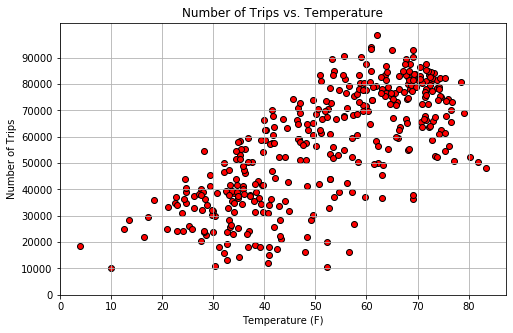

In [32]:
#Plot Number of Bike Trips Vs. Temperature
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.scatter(df["temperature"], df["trip numbers"], marker='o', facecolor="red", edgecolor = "black")
ymarks=[i for i in range(0,100000,10000)]
plt.yticks(ymarks)
plt.title("Number of Trips vs. Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Trips")
plt.grid()
plt.savefig('Output/TripsVsTemp.png')
plt.show()

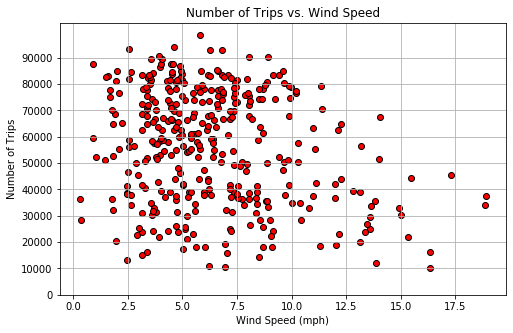

In [33]:
#Plot Number of Bike Trips Vs. Wind Speed
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.scatter(df["wind speed"], df["trip numbers"], marker='o', facecolor="red", edgecolor = "black")
ymarks=[i for i in range(0,100000,10000)]
plt.yticks(ymarks)
plt.title("Number of Trips vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Number of Trips")
plt.grid()
plt.savefig('Output/TripsVsWind.png')
plt.show()

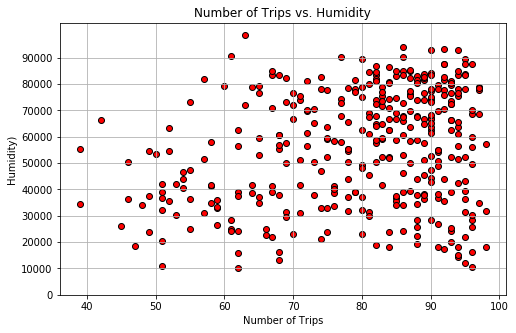

In [34]:
#Plot Number of Bike Trips Vs. Humidity
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.scatter(df["humidity"], df["trip numbers"], marker='o', facecolor="red", edgecolor = "black")
ymarks=[i for i in range(0,100000,10000)]
plt.yticks(ymarks)
plt.title("Number of Trips vs. Humidity")
plt.xlabel("Number of Trips")
plt.ylabel("Humidity)")
plt.grid()
plt.savefig('Output/TripsVsHumidity.png')
plt.show()

In [35]:
#Find the number of clear, cloudy, rainy and snowy days in 2019 in NYC
conditions=df['conditions'].value_counts()
#conditions
print(f"cloudy days: {conditions[0]}, clear days: {conditions[1]}, rainy days: {conditions[2]}, snowy days: {conditions[3]} ")

cloudy days: 204, clear days: 89, rainy days: 67, snowy days: 5 


In [36]:
#average trip duration for 2019
tripduration=bike_data['tripduration'].mean()
ave_tripduration=tripduration/60
print(f"Average trip duration for 2019 is {int(ave_tripduration)} minutes")

Average trip duration for 2019 is 16 minutes


In [38]:
#Find average trip duration monthly for 2019
avg_trip=[]
months=["-01-", "-02-", "-03-", "-04-", "-05-", "-06-", "-07-", "-08-", "-09-", "-10-", "-11-", "-12-"]
for month in months:
    bike_data_month=bike_data[bike_data["date"].str.contains(month)]
    tripduration=bike_data_month['tripduration'].mean()
    avg_tripduration=int(tripduration/60)
    avg_trip.append(avg_tripduration)
    #print(f"Average trip duration for {month} 2019 is {avg_tripduration} minutes")
print(avg_trip)

[12, 13, 14, 17, 17, 18, 17, 17, 16, 15, 13, 13]


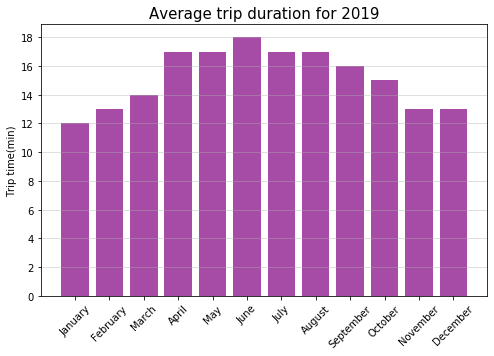

In [57]:
#Plot average trip duration monthly for 2019
month_name=["January", "February", "March", "April", "May", "June", "July", 
        "August", "September", "October", "November", "December"]

plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.grid(axis="y", alpha=0.5)
plt.bar(month_name, avg_trip, color="purple", alpha=0.7)
plt.xticks(rotation=45) 
ymarks=[i for i in range(0,20,2)]
plt.yticks(ymarks)
#ax = plt.gca()
#ax.grid(which='major', axis='both', linestyle='--')
plt.title("Average trip duration for 2019", fontsize=15)
plt.ylabel("Trip time(min)")
plt.savefig("Output/Avg_trip_duration.png")
plt.show()

In [40]:
#Find gender distribution for 2019 (1-male, 2-female, 3-unknown)
gender=bike_data['gender'].value_counts()
print(f"males: {gender[1]}, females: {gender[2]}, unknown: {gender[0]}")

males: 14052230, females: 4938982, unknown: 1560305


In [42]:
#Find gender distribution for 2019 monthly (1-male, 2-female, 3-unknown)
males=[]
females=[]
for month in months:
    bike_data_month=bike_data[bike_data["date"].str.contains(month)]
    gender=bike_data_month['gender'].value_counts()
    males.append(gender[1])
    females.append(gender[2])
    #print(f"For month {month} of 2019 males: {gender[1]}, females: {gender[2]}, unknown: {gender[0]}")
print(f"males: {males}")
print(f"females: {females}")

males: [727116, 703455, 962593, 1218551, 1293779, 1399108, 1441058, 1530191, 1612056, 1425934, 1042505, 695884]
females: [206027, 203512, 293780, 409285, 462613, 527577, 543923, 588423, 626859, 512899, 351188, 212896]


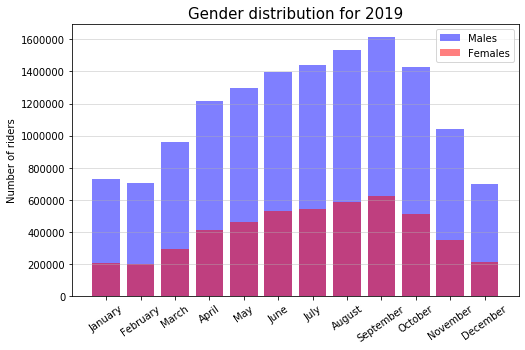

In [43]:
#Plot gender distribution for 2019 monthly
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.grid(axis="y", alpha=0.5)
plt.bar(month_name, males,  color="blue", alpha=0.5, label="Males")
plt.bar(month_name, females, color="red", alpha=0.5, label="Females")
plt.xticks(rotation=35) 
plt.title("Gender distribution for 2019", fontsize=15)
plt.ylabel("Number of riders")
plt.legend(loc='best')
plt.savefig("Output/Gender.png")
plt.show()

In [44]:
#create new column for bike rider age
bike_data["age"]=2019-bike_data['birth year']


In [45]:
bins=[0, 16, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
group_names=["under 16","16-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65", "over 65"]
bike_data["age group"]=pd.cut(bike_data['age'], bins, labels=group_names)
bike_data.head()

tripduration  start station id  birth year  gender        date starttime  \
0           320            3160.0        1971       1  2019-01-01  00:01:47   
1           316             519.0        1964       1  2019-01-01  00:04:43   
2           591            3171.0        1987       1  2019-01-01  00:06:03   
3          2719             504.0        1990       1  2019-01-01  00:07:03   
4           303             229.0        1979       1  2019-01-01  00:07:35   

   age age group  
0   48     45-50  
1   55     50-55  
2   32     30-35  
3   29     25-30  
4   40     35-40

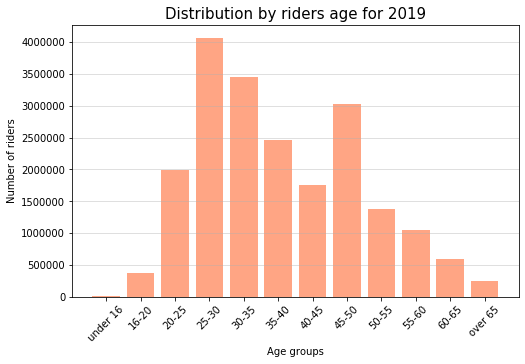

In [46]:
#Distribution by riders age
ages_keys=pd.value_counts(bike_data['age group'], sort=False).keys().tolist()
ages_keys
ages_count=pd.value_counts(bike_data['age group'], sort=False).tolist()
ages_count


plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.grid(axis="y", alpha=0.5)
plt.bar(ages_keys, ages_count, color="coral", alpha=0.7)
plt.xticks(rotation=45) 
plt.title("Distribution by riders age for 2019", fontsize=15)
plt.ylabel("Number of riders")
plt.xlabel("Age groups")
plt.savefig("Output/Riders_age.png")
plt.show()


In [47]:
most_popular_starttime=bike_data["starttime"].value_counts()
print(most_popular_starttime.head(10))

print(f"The most popular start time for 2019 is: {most_popular_starttime.head(1)}")

17:41:06    663
18:08:50    663
18:10:44    660
18:08:40    659
18:10:16    658
17:45:50    650
17:32:48    649
18:13:53    648
17:39:06    646
17:40:35    645
Name: starttime, dtype: int64
The most popular start time for 2019 is: 17:41:06    663
Name: starttime, dtype: int64


In [50]:
#scraping
url="https://www.citibikenyc.com/pricing"
response=requests.get(url)
soup=bs(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html class="no-js" lang="en">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-5XHC82');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>Citi Bike Membership &amp; Pass Options | Citi Bike NYC</title>
<meta content="Citi Bike is a fun and affordable way to get around the city. See pricing details for the Citi Bike Annual Membership and Day Pass." name="description"/>
<meta content="" name="keywords"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="en_us" property="og:locale"/>
<meta content="Citi Bike Membership &amp; Pass Options | Citi Bi

In [51]:
results = soup.find_all('div', class_='spacing--one-and-half')
results

[<div class="layout-split-1-2--flex layout-extension--split-4 spacing--one-and-half flex flex--wrap">
 <div class="column section__pricing-column">
 <div class="section__pricing-hero__option flex--align-self--stretch background-color--alpha padding padding--double-until-xlarge padding--bottom--double-until-xlarge spacing width--full position--relative">
 <div class="spacing--one-and-half">
 <div class="spacing--one-and-half--above-xlarge">
 <div class="section__pricing-hero--spacediv"></div>
 <h2 class="type-alpha--l text-color--white">Single Ride</h2>
 <div class="spacing--half">
 <p class="type-alpha--m text-color--white">$3/trip</p>
 <p class="type-alpha--s text-color--white">one ride up to 30 minutes on a classic bike.</p>
 </div> <!-- /.spacing--half -->
 </div> <!-- /.spacing -->
 <div class="spacing--double">
 <p class="section__pricing-hero__cta button--alpha button--alpha--inverse button--large"><a class="type-alpha--m--bold" href="/pricing/single-ride">Get a Pass</a></p>
 </d

In [52]:
results=soup.find_all('h2')
print(results)


[<h2 class="type-alpha--l text-color--white">Single Ride</h2>, <h2 class="type-alpha--l text-color--white">Day Pass</h2>, <h2 class="type-alpha--l text-color--alpha">Annual Membership</h2>, <h2 class="type-alpha--l text-color--white">More Options</h2>]


In [53]:
for result in results:
    plan=result.text
    print(plan)

Single Ride
Day Pass
Annual Membership
More Options


In [54]:
single_ride=soup.find('div', class_="spacing--half")
#print(single_ride)
print(f"Single Ride is: {single_ride.text}")


Single Ride is: 
$3/trip
one ride up to 30 minutes on a classic bike.



In [55]:
day_pass=soup.find_all('div', class_="spacing--half")[1]
#print(day_pass)
print(f"Day Pass is: {day_pass.text}")

Day Pass is: 
$12/day
unlimited 30-minute rides in a 24-hour period on a classic bike.



In [56]:
annual_pass=soup.find_all('div', class_="spacing--half")[2]
#print(annual_pass)
print(f"Annual Pass is: {annual_pass.text}")

Annual Pass is: 
$169/year
unlimited 45-minute rides on a classic bike.



In [ ]:
#close connection with MongoDB
client.close()